## 数据类型（结构）

### 向量

#### 访问向量子集

##### 通过which()返回符合条件的向量子集位置

In [4]:
v <- 4:10
which(v < 6)
v[which(v < 6)]

[1] 1 2

[1] 4 5

`which.max()`和`which.min()`作为扩展可以返回向量最值的位置

In [5]:
which.max(v)
which.min(v)

v[which.max(v)]

[1] 7

[1] 1

[1] 10

#### 为向量元素命名

可以在创建时进行命名，然后通过names()函数进行名字的修改。

In [7]:
v2 <- c("a" = 1, "b" = 2, "c" = 3)
print(v2)

a b c 
1 2 3 


In [9]:
names(v2) <- letters[4:6]
print(v2)

d e f 
1 2 3 


然后可以对其中的元素进行提取，这其中需要区分`[]`和`[[]]`，`[]`可以提取对象的子集，`[[]]`可以提取对象内的元素。当元素未命名时，两者没有区别，但当命名时：

In [11]:
print(v2[2])
print(v2[[2]])

print(v2["e"])
print(v2[["e"]])

e 
2 
[1] 2
e 
2 
[1] 2


### 矩阵

#### 矩阵生成

matrix()函数,常用参数：
- `data`：输入矩阵的数据。
- `nrow/ncol`：决定矩阵的行列数。
- `byrow`：布尔值，决定是否按行创建矩阵。默认按列进行排列。

In [4]:
matrix(seq(1, 20), nrow = 4, byrow = TRUE)

1,2,3,4,5
6,7,8,9,10
11,12,13,14,15
16,17,18,19,20


#### 矩阵命名

可以在生成时创建：

In [27]:
mat <- matrix(seq(1, 12), nrow = 3, byrow = TRUE, dimnames = list(letters[1:3], LETTERS[1:4])) # dimnames赋值的列表中，第一个元素指定了矩阵的行名，第二个元素指定了矩阵的列名 # nolint: line_length_linter.
print(mat)

  A  B  C  D
a 1  2  3  4
b 5  6  7  8
c 9 10 11 12


也可以生成后在进行修改：

In [16]:
dimnames(mat) <- list(letters[4:6], LETTERS[4:6])
print(mat)

rownames(mat) <- letters[7:9]
colnames(mat) <- LETTERS[7:9]
print(mat)

  D E F
d 1 2 3
e 4 5 6
f 7 8 9
  G H I
g 1 2 3
h 4 5 6
i 7 8 9


#### 访问矩阵子集

通常在进行矩阵子集的提取时，会使用一个二维存取器`[,]`来访问。虽然矩阵是用两个维度表示和访问，但它本质上仍然是向量，因此，<span style = 'color:red'><strong>向量的一维存取器也可以用来构建矩阵子集。</span></strong>

In [18]:
print(mat>5)

print(mat[mat>5]) # 提取后为向量形式

      G     H     I
g FALSE FALSE FALSE
h FALSE FALSE  TRUE
i  TRUE  TRUE  TRUE
[1] 7 8 6 9


#### 矩阵操作以及计算

查看行列数

In [5]:
data <- matrix(seq(1, 20), nrow = 4, byrow = TRUE)
nrow(data)
ncol(data)

[1] 4

[1] 5

### 数组

具体来说，多维数据就是一个维度更高（通常大于2）、可访问的向量，是向量/矩阵向更高维度的自然推广。多维数组也要求元素是同一类型。

#### 数组创建

```r
array(data = NA, dim = length(data), dimnames = NULL)
```

In [21]:
a1 <- array(data = seq(1, 24), dim = c(2, 4, 3))
print(a1)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    3    5    7
[2,]    2    4    6    8

, , 2

     [,1] [,2] [,3] [,4]
[1,]    9   11   13   15
[2,]   10   12   14   16

, , 3

     [,1] [,2] [,3] [,4]
[1,]   17   19   21   23
[2,]   18   20   22   24



#### 数组命名

可以在创建时命名，或者直接重命名：

In [26]:
a1 <- array(data = seq(1, 24), dim = c(2, 4, 3), dimnames = list(
    letters[1:2],
    LETTERS[1:4],
    paste0("p",1:3)
    )) # 类似地，命名的顺序依次为行，列，页名

print(a1)

, , p1

  A B C D
a 1 3 5 7
b 2 4 6 8

, , p2

   A  B  C  D
a  9 11 13 15
b 10 12 14 16

, , p3

   A  B  C  D
a 17 19 21 23
b 18 20 22 24



#### 访问多维数组子集

类似地，利用三维存取器进行子集的访问：

In [28]:
print(a1[1,2,1]) # 访问第一页第一行第二列的内容
print(a1[, , "p3"]) # 访问第三页的所有数据

[1] 3
   A  B  C  D
a 17 19 21 23
b 18 20 22 24


### 列表

列表可以包含不同类型的对象，甚至可以包括其他列表，正是因为其能够将不同类型的对象打包到一起，所以可以十分方便的根据位置和名字进行访问。

#### 创建列表

```r
list()
```

#### 列表命名

可以在创建时命名，或者后续重命名（这与向量的做法是类似的）：

In [2]:
l1 <- list(a = 1:4, b = c(TRUE, FALSE), c = matrix(1:9, nrow = 3)) # 创建的列表分为3个部分，分别是数值向量，逻辑向量，矩阵 # nolint
print(l1)

$a
[1] 1 2 3 4

$b
[1]  TRUE FALSE

$c
     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9



In [5]:
names(l1) <- LETTERS[1:3]
print(l1)

names(l1) <- NULL # 移除列表名字
print(l1)

$A
[1] 1 2 3 4

$B
[1]  TRUE FALSE

$C
     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9

[[1]]
[1] 1 2 3 4

[[2]]
[1]  TRUE FALSE

[[3]]
     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9



#### 提取列表成分

In [9]:
l2 <- list(a = 1:4, b = c(TRUE, FALSE), c = matrix(1:9, nrow = 3))
# 三种提取方式
print(l2[[1]]) 
# 如果列表已经命名，可以使用以下两种方式，提取的是具体元素
print(l2$a)
print(l2[["a"]])

[1] 1 2 3 4
[1] 1 2 3 4
[1] 1 2 3 4


#### 提取列表子集

有些时候需要从列表中提取多个成分及其内容，由这些成分组成的列表构成了原列表的一个子集。就像提取向量和矩阵的子集一样，提取一个列表子集也用`[]`，`[]`中可以填入数值向量表示成分的位置，也可以直接用字符向量表示成分名字，更加地，用逻辑向量指定是否选择来取出列表成分。

In [10]:
# 提取的列表子集属性还是列表
print(l2[c(1,2)])
print(l2["a"])

$a
[1] 1 2 3 4

$b
[1]  TRUE FALSE

$a
[1] 1 2 3 4



此时仍然要区分`[]`和`[[]]`的区别，用`[]`提取若干成分时，返回列表的子集，即还是列表。但是用`[[]]`提取只会返回对应成分的元素。

In [11]:
test1 <- l2[["a"]]
test2 <- l2["a"]
print(class(test1)) # 返回对应成分元素的数据类型
print(class(test2))

[1] "integer"
[1] "list"


#### 列表函数

##### unlist()

unlist()函数可以对列表进行去列表化，将一个列表<span style = 'color:red'><strong>打破成分界线</strong></span>，强制转换成一个向量（若列表的成分具有不同类型，则自动<span style = 'color:red'><strong>向下兼容到同一类型。</strong></span>）

In [12]:
l3 <- list(a = 1:2, b = 3:4)
print(unlist(l3))

a1 a2 b1 b2 
 1  2  3  4 


In [15]:
l4 <- list(a = 1:3, b = letters[1:3])
print(unlist(l4))

 a1  a2  a3  b1  b2  b3 
"1" "2" "3" "a" "b" "c" 


tidyverse系列中的purrr包提供了一系列列表相关的函数，需要我们进一步学习：

##### pluck()

`pluck()`函数实现了一种广义的`[[`，这种提取方法能够在数据结构中更加深入而灵活地进行索引。如果尝试访问的索引不存在或为NULL，则返回.default。
```r
pluck(.x, ..., .default = NULL)
```
`pluck <- value`是赋值的等价物，这将允许在嵌套数据结构中修改对象。

参数解释：
- `...`：一组访问器，用于索引对象。可以是正整数、负整数（从右边索引）、<span style = 'color:red'><strong>字符串（用于索引名称）</strong></span>或访问器函数（除了只支持名称和位置的赋值变种）。
参数支持动态点号（dynamic dots），这在进行<span style = 'color:red'><strong>多层级的访问</strong></span>时十分重要。
- `.default`：如果目标为NULL或不存在，则要使用的值（相当于对不存在的值进行赋值）。

In [3]:
# create a list:
obj1 <- list("a", list(1, elt = "foo"))
obj2 <- list("b", list(2, elt = "bar"))
x <- list(obj1, obj2)
print(x)
# pluck() provides a way of retrieving objects from such data
# structures using a combination of numeric positions, vector or
# list names, and accessor functions.

[[1]]
[[1]][[1]]
[1] "a"

[[1]][[2]]
[[1]][[2]][[1]]
[1] 1

[[1]][[2]]$elt
[1] "foo"



[[2]]
[[2]][[1]]
[1] "b"

[[2]][[2]]
[[2]][[2]][[1]]
[1] 2

[[2]][[2]]$elt
[1] "bar"





In [4]:
library(purrr)
# Numeric positions index into the list by position, just like `[[`:
print(pluck(x, 1))
# same as x[[1]]

[[1]]
[1] "a"

[[2]]
[[2]][[1]]
[1] 1

[[2]]$elt
[1] "foo"




In [5]:
# Index from the back
print(pluck(x, -1))
# same as x[[2]]

[[1]]
[1] "b"

[[2]]
[[2]][[1]]
[1] 2

[[2]]$elt
[1] "bar"




In [6]:
print(pluck(x, 1, 2))
# same as x[[1]][[2]]

[[1]]
[1] 1

$elt
[1] "foo"



In [7]:
# Supply names to index into named vectors:
print(pluck(x, 1, 2, "elt"))
# same as x[[1]][[2]][["elt"]]

[1] "foo"


### 数据框

更多的细节想看tibble部分，关于分析数据框的一些有用函数：

#### str()

str()函数或者glimpse()函数作用在对象上可以查看其结构：

In [17]:
library(tidyverse)
str(as_tibble(iris))

tibble [150 × 5] (S3: tbl_df/tbl/data.frame)
 $ Sepal.Length: num [1:150] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num [1:150] 3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num [1:150] 1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num [1:150] 0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


#### summary()

或者summray()函数查看各成分汇总信息：

In [30]:
summary(as_tibble(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## 时间序列对象

### 生成

可以用`ts()`函数生成时间序列对象，但只推荐利用该函数生成年度，季度，月度数据，周度、日度数据不是很推荐。这些对象是带有 "ts" 类别（和一些其他属性）的向量或矩阵。数据创建后便于进一步的时间序列分析：
```r
ts(data = NA, start = 1, end = numeric(), frequency = 1,
   deltat = 1, ts.eps = getOption("ts.eps"), class = , names = )
```

参数解释：
- `data`：观察到的时间序列<span style = 'color:red'><strong>值的向量或矩阵</strong></span>。注意，如果传入数据框，则将通过`data.matrix`强制转换为数值矩阵，然后再进行转换。对数值向量来说，生成后只有一个时间序列。但对数值矩阵来说，矩阵的每一列都是一个单独的时间序列。
- `start`：参数指定第一次观察的时间。可以是一个数字或两个数字的向量（第二个数字是整数）。如果参数只指定一个数字，那么该数字常常被指定为起始年份（此时frequency指定为1）。如果参数指定为两个数字的向量，那么第二个数字与`frequency`或者`deltat`参数有关。以`frequency`参数为例，如果`frequency`分别为4，12，52， 365那么第二个数字代表具体的季度，月，周，日。
- `end`：最后一次观察的时间，用法同`start`参数。
- `frequency`：单位时间内的观测次数。例如：特别是当`start`参数的第一个数字指定自然时间为年份时，`frequency`取值为1，4，12，52，365代表时间跨度为年，季度，月，周，日。
- `deltat`：连续观测之间的采样周期分数；例如，月度数据的`deltat`为1/12。只能提供`frequency`或`deltat`中的一个。
- `class`：决定输出结果的类别，如果为NULL或 "none" 则为none。对于单个序列，默认为"ts"类型；对于多个序列（如依据矩阵生成的），可以在c("mts", "ts", "matrix")中选择一个。
- `names`：参数为指定多个时间序列名称的字符向量（特别是依据矩阵生成的多时间序列）：默认为数据的列名（colnames），如果没有指定列名和`names`参数，自动设置为 Series 1，Series 2 等等。

In [37]:
ts1 <- ts(
  data = matrix(1:20, ncol = 4), 
  start = c(2023, 2),
  frequency = 4,
  names = letters[1:4]
)

ts2 <- ts(
  data = 1:20,
  start = 2023,
  deltat = 1 / 12
)

In [38]:
print(ts1)

        a  b  c  d
2023 Q2 1  6 11 16
2023 Q3 2  7 12 17
2023 Q4 3  8 13 18
2024 Q1 4  9 14 19
2024 Q2 5 10 15 20


In [39]:
print(ts2)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2023   1   2   3   4   5   6   7   8   9  10  11  12
2024  13  14  15  16  17  18  19  20                


### fpp3

时间序列可以认为是“指标数据+时间索引”（或者再加“分组索引”）的形式。fpp3生态下的tsibble包提供了整洁的时间序列数据结构tsibble。更多的细节见我的数据建模部分。这里推荐一本书<span style = 'color:red'><strong>《Forecasting: Principles and Practice (3rd)》</strong></span>

### 提取属性

#### attributes()

可以用`attributes()`查看所有时间序列的属性，再用`$`提取。不过关于时间的属性信息是tsp格式的。

In [19]:
attributes(ts1)

$dim
[1] 5 4

$dimnames
$dimnames[[1]]
NULL

$dimnames[[2]]
[1] "a" "b" "c" "d"


$tsp
[1] 2023.25 2024.25    4.00

$class
[1] "mts"    "ts"     "matrix"

#### as.Date.ts()

`zoo`包中的`as.Date.ts()`函数可以直接提取时间序列中的时间信息，这更符合我们的需求。

In [20]:
library(zoo)
as.Date.ts(ts2)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




[1] "2023-01-01" "2023-02-01" "2023-03-01" "2023-04-01" "2023-05-01"
 [6] "2023-06-01" "2023-07-01" "2023-08-01" "2023-09-01" "2023-10-01"
[11] "2023-11-01" "2023-12-01" "2024-01-01" "2024-02-01" "2024-03-01"
[16] "2024-04-01" "2024-05-01" "2024-06-01" "2024-07-01" "2024-08-01"

## 用tibble创建数据框

tibble包可以创建tibble类型的数据集并进行相关操作。tibble是一种简单数据框，它对传统数据框dataframe的功能进行了一些修改，以便更易于使用。

### as_tibble()

转换成tibble格式的数据框。

In [21]:
as_tibble(iris) %>%
  print()

# A tibble: 150 × 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# ℹ 140 more rows


### tibble()和tribble()

tibble()和tribble()都可以创建数据框，两者略有不同：tribble是按行输入。

In [22]:
set.seed(2000)
test1 <- tibble(
    col1 = rnorm(5),
    col2 = rnorm(5),
    col3 = rnorm(5),
)

test2 <- tribble(
    ~col1, ~col2,
    "a", 1,
    "b", 2,
    "c", 3
)
print(test1)
print(test2)

# A tibble: 5 × 3
    col1   col2   col3
   <dbl>  <dbl>  <dbl>
1 -0.854 -1.18   1.89 
2 -0.353 -1.94   0.836
3  0.890  2.09   1.35 
4  1.74   0.225 -0.192
5  0.916  1.18   0.193
# A tibble: 3 × 2
  col1   col2
  <chr> <dbl>
1 a         1
2 b         2
3 c         3


### add_column()和add_row()

两个函数分别用来添加列和行。

add_column()有两点要注意：
- 不能覆写已经存在的字段列，即列名不能一样。
- 值的个数要保持与其他列一致。
 
函数参数：
- `.data`：进行操作的数据集。
- `...`：指定添加的列名和值。中间用等号连接。
- `.before, .after`：指定添加的位置，用数字表示，默认最后一列。

In [23]:
library(tidyverse)
set.seed(199)
tibb1 <- tibble(x = 1:3, y = 3:1)%>%
  add_column(z = round(rnorm(n = 3), 1), .before = 1)

tibb2 <- tibble(x = 1:3, y = 3:1)%>%
  add_column(z = round(rnorm(n = 3), 1), .after = 2)

print(tibb1)
print(tibb2)

# A tibble: 3 × 3
      z     x     y
  <dbl> <int> <int>
1  -1.9     1     3
2   0.6     2     2
3  -2.2     3     1
# A tibble: 3 × 3
      x     y     z
  <int> <int> <dbl>
1     1     3   0.5
2     2     2  -0.6
3     3     1   0.6


add_row()有两点要注意：
- 必须一一对应哪一列添加哪个或添加哪些值，若指定不全会用`NA`代替。
- 不能通过添加行的方式增加新的变量列。
 
函数参数：
- `.data`：进行操作的数据集。
- `...`：指定添加的行名和值。
- `.before, .after`：指定添加的位置，用数字表示，默认最后一行。

In [24]:
set.seed(199)
tbl1 <- tibble(x = 1:3, y = 3:1)%>%
  add_row(x = 0, y = 0, .before = 1)

tbl2 <- tibble(x = 1:3, y = 3:1)%>%
  add_row(x = 0, .after = 2)

print(tbl1)
print(tbl2)

# A tibble: 4 × 2
      x     y
  <dbl> <dbl>
1     0     0
2     1     3
3     2     2
4     3     1
# A tibble: 4 × 2
      x     y
  <dbl> <int>
1     1     3
2     2     2
3     0    NA
4     3     1


此外`cind()`和`rbind()`也可以进行对应的操作：

### 规范操作

#### 行名操作

判断是否有行名：
```r
has_rownames(.data)
```
删除行名：
```r
remove_rownames(.data)
```
行名转换成列：
```r
rownames_to_column(.data, var = "")
```
列转换成行名
```r
column_to_rownames(.data, var = "")
```

### 提取数据框元素，子集

#### 以列表方式提取数据框的元素，子集

若把数据框看做由向量组成的列表，则可以沿用列表的操作方式提取元素或构建子集。

In [25]:
tbl <- head(nycflights13::flights, 10)
print(tbl$dep_time)

 [1] 517 533 542 544 554 554 555 557 557 558


In [26]:
print(tbl[["dep_time"]])

 [1] 517 533 542 544 554 554 555 557 557 558


In [27]:
print(tbl["dep_time"])

# A tibble: 10 × 1
   dep_time
      <int>
 1      517
 2      533
 3      542
 4      544
 5      554
 6      554
 7      555
 8      557
 9      557
10      558


#### 以矩阵方式提取数据框的元素，子集

以列表形式操作并不支持行选择，以矩阵选择操作则更加灵活。仍然使用二维提取器的方式。

In [28]:
print(tbl[1:2, ])

# A tibble: 2 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
# ℹ 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


In [29]:
print(tbl[[1:2, ]])

ERROR: [1m[33mError[39m in `tbl[[1:2, ]]`:[22m
[1m[22m[33m![39m Subscript can't be missing for tibbles in `[[`.


可以看到tibbles在使用`$`、`[[`和`[`访问列、行或单元格时的行为会有差异：
- `[` 默认情况下<span style = 'color:red'><strong>总是返回一个tibble对象</strong></span>，即使只访问一个列。这意味着提取的是数据集的子集：即使只选择一个列，也会返回一个包含该列的tibble，而不是返回一个向量或列表。
- 对于`$`和`[[`，它们提取的是数据框的元素。不支持使用<span style = 'color:red'><strong>部分匹配</strong></span>的列名，如果尝试这样做，将返回NULL并给出警告。这意味着无法使用部分列名来访问列，必须使用完全匹配的列名。
- 只能使用标量（长度为1的向量）或与行数相同长度的向量进行赋值操作。这意味着在更新tibble的列时，只能使用长度与行数相同的向量或标量。
- 不能访问超出tibble边界之外的行。这意味着无法通过索引访问不存在的行。
- 当使用`[[<-`和`[<-`进行更新时，整列的类型转换是支持的，但是更新列的一部分时，新值必须可以转换为现有类型。这意味着在更新tibble的部分列时，新值的类型必须与原始列的类型兼容。

此外若要想在管道中使用这些提取操作，需要使用特殊的占位符 `.`：

In [ ]:
tbl %>%
  .$dep_time

tbl %>%
  .[["dep_time"]]

tbl %>%
  .["dep_time"]

[1] 517 533 542 544 554 554 555 557 557 558

[1] 517 533 542 544 554 554 555 557 557 558

dep_time
<int>
517
533
542
544
554
554
555
557
557


### 打印

tibble的打印方法进行了优化，只显示前10行结果，并且列也是适合屏幕的，这种方式非常适合大数据集。此外，除了打印列名，tibble还会打印出列的类型。可以通过传入参数`n`决定打印的行数。

In [ ]:
as_tibble(mpg)%>%
    print(n = 10)

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# ℹ 224

## 使用forcats处理因子

### 创建因子

创建因子的步骤主要分为两个，<span style = 'color:red'><strong>一是输入因子，二是定义水平</strong></span>。

一种可行的方法是`factor()`函数：
```r
factor(x = character(), levels, labels = levels,
       exclude = NA, ordered = is.ordered(x), nmax = NA)
```
其中labels设置各水平名称（前缀），它是与水平名称一一对应的。ordered设置是否对因子水平排序，若设置为TRUE则为有序因子。

正确的做法：
```r
x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar")
month_levels <- c(
 "Jan", "Feb", "Mar", "Apr", "May", "Jun",
 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
) # 水平的顺序要注意

y1 <- factor(x1, levels = month_levels)
y1
#> [1] Dec Apr Jan Mar
#> Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
```

此时将因子进行排序，会按照定义的水平进行排序：
```r
sort(y1)
#> [1] Jan Mar Apr Dec
#> Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
```

不在有效水平集合内的所有值都会自动转换为 NA：
```r
y2 <- factor(x2, levels = month_levels)
y2
#> [1] Dec Apr <NA> Mar
#> Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
```

如果省略了定义水平的这个步骤，那么会将<span style = 'color:red'><strong>按字母顺序排序的数据</strong></span>作为水平：
```r
factor(x1)
#> [1] Dec Apr Jan Mar
#> Levels: Apr Dec Jan Mar
sort(x1)
#> [1] Apr Dec Jan Mar
#> Levels: Apr Dec Jan Mar
```

有时会想让因子的顺序与初始数据的顺序保持一致。这在转换数据集中字符串类型数据时常常有用。在创建因子时，将水平设置为unique(x)，或者在创建因子后再对其使用 fct_inorder() 函数，就可以达到这个目的：
```r
f1 <- factor(x1, levels = unique(x1))
f1
#> [1] Dec Apr Jan Mar
#> Levels: Dec Apr Jan Mar
f2 <- x1 %>% factor() %>% fct_inorder()
f2
#> [1] Dec Apr Jan Mar
#> Levels: Dec Apr Jan Mar

而forcats包中的fct()函数则与factor()有两点不同
1. 指定的因子必须在水平之中，不在水平中的因子要通过`na`参数指明，否则报错。
2. `fct()`若不指定levels水平，会自动让因子水平的顺序与原数据保持一致。

**此外还需注意，fct()接受的输入必须为字符串向量。**

In [ ]:
x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar")
month_levels <- c(
 "Jan", "Feb", "Mar", "Apr", "May", "Jun",
 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

fct(x2, levels = month_levels)

ERROR: [1m[33mError[39m in `fct()`:[22m
[1m[22m[33m![39m All values of `x` must appear in `levels` or `na`
[36mℹ[39m Missing level: "Jam"


In [ ]:
fct(x1)

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

### 计算因子各水平频数

一种可用的方法是用`table()`函数：

In [15]:
print(
    table(gss_cat$partyid)
)


         No answer         Don't know        Other party  Strong republican 
               154                  1                393               2314 
Not str republican       Ind,near rep        Independent       Ind,near dem 
              3032               1791               4119               2499 
  Not str democrat    Strong democrat 
              3690               3490 


`fct_count()`可以计算因子隔水平频数，占比，可按频数排序：
```r
fct_count(f, sort = FALSE, prop = FALSE)
```

In [13]:
fct_count(gss_cat$partyid, sort = T, prop = T)

f,n,p
<fct>,<int>,<dbl>
Independent,4119,1.917330e-01
Not str democrat,3690,1.717637e-01
Strong democrat,3490,1.624540e-01
Not str republican,3032,1.411349e-01
"Ind,near dem",2499,1.163245e-01
Strong republican,2314,1.077131e-01
"Ind,near rep",1791,8.336824e-02
Other party,393,1.829353e-02
No answer,154,7.168459e-03


### 改变因子水平的顺序

在R中，因子变量的水平具有一定的顺序。如果没有明确指定因子水平的顺序，R会默认排序，可能是根据因子的字母顺序或数值大小等规则自动创建水平（这一点在factor()函数部分讲到过）。这些函数可以对因子水平的顺序进行重排。

`fct_relevel()`函数可以手动对水平值重新排序：
```r
fct_relevel(.f, ..., after = 0L)
```

In [16]:
f <- factor(letters[1:3])
print(levels(f))
adj.f <- fct_relevel(f, c("b", "a", "c"))
print(levels(adj.f))

[1] "a" "b" "c"
[1] "b" "a" "c"


`fct_infreq()`函数可以按照高频优先顺序对因子水平进行重排序：
```r
fct_infreq(f, w = NULL, ordered = NA)
```
其中w参数表示权重，ordered参数表示是否转换成有序因子。

In [22]:
print(levels(gss_cat$partyid))
fct_count(gss_cat$partyid)

adj.df <- mutate(gss_cat, partyid = fct_infreq(partyid))
print(levels(adj.df$partyid))
fct_count(adj.df$partyid)

 [1] "No answer"          "Don't know"         "Other party"       
 [4] "Strong republican"  "Not str republican" "Ind,near rep"      
 [7] "Independent"        "Ind,near dem"       "Not str democrat"  
[10] "Strong democrat"   


f,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690


 [1] "Independent"        "Not str democrat"   "Strong democrat"   
 [4] "Not str republican" "Ind,near dem"       "Strong republican" 
 [7] "Ind,near rep"       "Other party"        "No answer"         
[10] "Don't know"        


f,n
<fct>,<int>
Independent,4119
Not str democrat,3690
Strong democrat,3490
Not str republican,3032
"Ind,near dem",2499
Strong republican,2314
"Ind,near rep",1791
Other party,393
No answer,154


`fct_reorder()`函数根据其他变量或函数的结果进行因子水平的重排序。参数较多，可以自行查阅官方文档，最主要用两个参数：
- `.f`: 要重新排序的因子变量。
- `.x`: 用于排序的指标变量。可以是一个数值向量、一个函数或一个公式。最常见的还是数值向量的形式。

> 需要区分的是，虽然arrange()和fct_reorder()可能要达到的效果是相似的，但arrange()不能改变因子水平的本质顺序，虽然它确实按照条件重排了因子。而fct_reorder()改变了因子水平的顺序（内在存储发生了改变），虽然没有显现出来。

In [17]:
df1 <- gss_cat %>%
  group_by(marital) %>%
    summarise(
      sum_hour = sum(tvhours, na.rm = TRUE)
    ) %>%
      mutate(marital = fct_reorder(marital, desc(sum_hour))) 
df1
print(levels(df1$marital))

df2 <- gss_cat %>%
  group_by(marital) %>%
    summarise(
      sum_hour = sum(tvhours, na.rm = TRUE)
    ) %>%
      arrange(desc(sum_hour))
df2
print(levels(df2$marital))

marital,sum_hour
<fct>,<int>
No answer,23
Never married,9300
Separated,1395
Divorced,5455
Widowed,3912
Married,13708


[1] "Married"       "Never married" "Divorced"      "Widowed"      
[5] "Separated"     "No answer"    


marital,sum_hour
<fct>,<int>
Married,13708
Never married,9300
Divorced,5455
Widowed,3912
Separated,1395
No answer,23


[1] "No answer"     "Never married" "Separated"     "Divorced"     
[5] "Widowed"       "Married"      


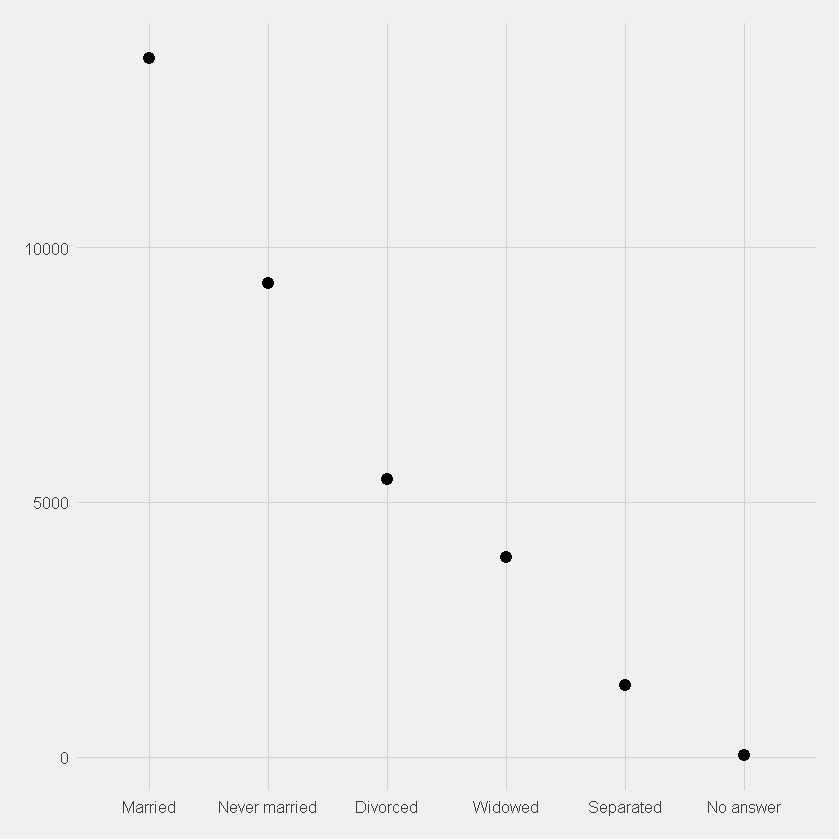

In [20]:
library(tidyverse)
library(ggthemes)
gss_cat %>%
  group_by(marital) %>%
    summarise(
      sum_hour = sum(tvhours, na.rm = TRUE)
    ) %>%
      mutate(marital = fct_reorder(marital, desc(sum_hour))) %>%
        ggplot(aes(x = marital, y = sum_hour)) +
          geom_point(size = 3) +
          theme_fivethirtyeight()

### 添加和删除因子水平

`fct_expand()`函数可以用于添加因子水平，其参数：
- `f`：一个因子或者字符串向量（特别注意，当输入为字符串向量时，会默认按照字母顺序重新排序新水平）。
- `...`：将要添加的新水平，重复的水平会被忽略。
- `after`：新水平将要被放置的位置，以数字的形式给出。默认为Inf，即被添加至最后。

In [ ]:
x1 <- c("Feb", "Oct", "Jan", "Jul")
month_levels <- c(
 "Jan", "Feb", "May", "Jun",
 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)
x2 <- fct(x1, levels = month_levels)
x2
fct_expand(x2, c("Mar", "Apr"), after = 2)

[1] Feb Oct Jan Jul
Levels: Jan Feb May Jun Jul Aug Sep Oct Nov Dec

[1] Feb Oct Jan Jul
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

`fct_drop()`函数可以用于删除因子水平（且只删除未被使用的水平），其参数：
- `f`：一个因子或者字符串向量（特别注意，当输入为字符串向量时，会默认按照字母顺序重新排序新水平）。
- `only`：指定将要删除的水平，不赋值则默认删除所有水平。

In [ ]:
fct_drop(x2, only = c("Mar", "Apr"))

[1] Feb Oct Jan Jul
Levels: Jan Feb May Jun Jul Aug Sep Oct Nov Dec

### 修改因子水平

修改水平不仅可以使得图形标签更美观清晰，还可以将水平汇集成更高层次的显示。一种可行的方法是通过`levels(x) <- `赋值：

`fct_recode()`函数对水平值逐个重编码：

In [6]:
library(tidyverse)
# 未修改因子水平之前，对数据集的partyid列进行频数统计
gss_cat%>%
    count(partyid)
print(levels(gss_cat$partyid))

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690


 [1] "No answer"          "Don't know"         "Other party"       
 [4] "Strong republican"  "Not str republican" "Ind,near rep"      
 [7] "Independent"        "Ind,near dem"       "Not str democrat"  
[10] "Strong democrat"   


In [8]:
# fct_recode()会让没有明确提及的因子水平保持原样，其余则会修改。修改时原先的因子水平在右手边：
frame <- as_tibble(gss_cat)%>%
   mutate(partyid = fct_recode(partyid,
      "Republican, strong" = "Strong republican",
      "Republican, weak" = "Not str republican",
      "Independent, near rep" = "Ind,near rep",
      "Independent, near dem" = "Ind,near dem",
      "Democrat, weak" = "Not str democrat",
      "Democrat, strong" = "Strong democrat"
   )
   ) %>%
      count(partyid)
frame
print(levels(frame$partyid))

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690


 [1] "No answer"             "Don't know"            "Other party"          
 [4] "Republican, strong"    "Republican, weak"      "Independent, near rep"
 [7] "Independent"           "Independent, near dem" "Democrat, weak"       
[10] "Democrat, strong"     


`fct_collapse()`函数是`fct_recode()` 函数的变体，该函数可以按照自定义方式合并水平。

In [10]:
df <- gss_cat %>%
  mutate(new_partyid = fct_collapse(partyid,
    "other" = "No answer",
    "rep" = c("Strong republican", "Not str republican"),
    "ind" = c("Ind,near rep", "Independent", "Ind,near dem"),
    "dem" = c("Not str democrat", "Strong democrat")
    )
  ) %>%
  count(new_partyid)
df
print(levels(df$new_partyid))

new_partyid,n
<fct>,<int>
other,154
Don't know,1
Other party,393
rep,5346
ind,8409
dem,7180


[1] "other"       "Don't know"  "Other party" "rep"         "ind"        
[6] "dem"        


`fct_lump_*()`族函数将不常见的因子水平合并为"other"，也是一种合并形式，几种常见的族函数：
```r
fct_lump_min(f, min, w = NULL, other_level = "Other") # 合并出现次数小于min次的水平
```

```r
fct_lump_prop(f, prop, w = NULL, other_level = "Other") # 合并出现次数少于（或等于）prop * n 次的水平。
```

```r
fct_lump_n( 
  f,
  n,
  w = NULL,
  other_level = "Other",
  ties.method = c("min", "average", "first", "last", "random", "max")
  ) # 合并除了n个最常见的水平之外的所有水平（如果n < 0，则是最不常见的水平）
```

In [27]:
lump.n <- mutate(mpg, class = fct_lump_n(class, n = 5, other_level = "others")) # 选出5个最常见的水平
fct_count(lump.n$class)

f,n
<fct>,<int>
compact,47
midsize,41
pickup,33
subcompact,35
suv,62
others,16


In [26]:
lump.min <- mutate(mpg, class = fct_lump_min(class, min = 6, other_level = "others"))
fct_count(lump.min$class)

f,n
<fct>,<int>
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62
others,5


## 使用lubridate进行日期时间处理

日期时间值通常以字符串形式传入R中，然后转换为以数值形式存储的日期时间变量。lubridate包是用于处理日期和时间数据的常用工具包。它提供了许多方便的函数和方法，用于解析、操作和格式化日期时间对象。

In [19]:
library(lubridate)

### 创建日期或时间

表示日期或时间的数据有 3 种类型。
- 日期：在 tibble 中显示为 `<date>`。
- 时间：一天中的某个时刻，在 tibble 中显示为 `<time>`。
- 日期时间：可以唯一标识某个时刻（通常精确到秒）的日期加时间，在 tibble 中显示为`<dttm>`。而这种类型在 R 语言的其他地方称为`POSIXct`。
  
以下 3 种方法可以创建日期或时间。
- 通过字符串创建。
- 通过日期时间的各个成分创建。
- 通过其他形式的数据或现有日期数据创建。

1. 通过字符串创建

最常见的方法：

In [18]:
date <- as_date("2023-09-18")
print(class(date))
print(date)

[1] "Date"
[1] "2023-09-18"


也可以通过后面介绍的解析字符串的方式创建日期或时间，但这样不便于创建时间序列。在此介绍一些生成时间序列的方法。

#### 时间间隔

在生成时间序列之前需要先了解时间间隔的知识，方便后续的时间数学运算。

##### 时期

`duration()`是一个用于创建持续时间对象的函数，它可以根据指定的数值创建一个持续时间对象。不同单位的数值是累积的。持续时间以<span style = 'color:red'><strong>秒</strong></span>为单位来显示时间跨度。当时间跨度很大时，持续时间也会用更大的单位来估算显示，但底层的对象始终以固定的秒数进行记录。为了显示和创建方便，各个单位会使用它们在秒钟中最常见的长度来进行转换，如：1分钟 = 60秒，1小时 = 3600秒，天 = 86400秒，1周 = 604800秒。

```r
duration(num = NULL, units = "seconds", ...)
```

参数：
- `num`：可以是数字或字符向量，表示时间单位的数量。一般赋值数字即可。
- `units`：字符字符串，指定 num 所涉及的单位类型。当 num 是字符向量时，此参数将被忽略。默认为seconds。
- `...`：测量持续时间的时间单位列表。支持秒、分钟、小时、天、周、月和年的持续时间计算。月和年的持续时间假设一年包含365.25天。

duration()函数的变体可以有`dseconds(x)，,dminutes(x), dhours(x), ddays(x = 1), dweeks(x = 1), dmonths(x = 1), dyears(x = 1)`，这样书写更加简洁。

In [ ]:
ddays(25) + dyears(1)

[1] "33717600s (~1.07 years)"

##### 阶段

阶段也是一种时间间隔，与时期duration不同，它不以秒为单位；相反，<span style = 'color:red'><strong>它使用“人工”时间</strong></span>，比如日和月。这使得它们使用起来更加直观，更容易符合我们的预期：不必考虑一些精确度。

```r
period(num = NULL, units = "second", ...)
```

同样具有简洁的变体函数：`seconds(x), minutes(x), hours(x), days(x), weeks(x), years(x)`。

In [20]:
#! 时期和阶段的区别

#! 闰年
time1 <- ymd("2016-01-01") + dyears(1)
time2 <- ymd("2016-01-01") + years(1)
print(time1)
print(time2)

[1] "2016-12-31 06:00:00 UTC"
[1] "2017-01-01"


In [ ]:
#! 夏时制
one_pm <- ymd_hms("2016-03-12 13:00:00", tz = "America/New_York")

one_pm + ddays(1) #! 由于夏时制，12日只有23h，而ddays指定的秒数为1天24h。
one_pm + days(1)

[1] "2016-03-13 14:00:00 EDT"

[1] "2016-03-13 13:00:00 EDT"

#### 生成日期时间向量

##### 利用函数

使用`seq.Date()`函数可以实现“人工”方法的日期（date）序列生成，这更符合我们的预期：
```r
seq.Date(from, to, by, length.out = NULL, along.with = NULL, ...)
```
使用`seq.POSIXt()`函数可以实现datetime型数据序列的生成。

主要参数解释：
- `from, to`：起始日期或时间。
- `by`：序列的递增值。
    - 一个数字，如果是date类型，则表示间隔为天数；如果是datetime类型，则表示间隔是秒。
    - 一个difftime类的对象。
    - 一个包含`"day"、"week"、"month"、"quarter"、"year"`之一的字符字符串（date类型）。或者"sec", "min", "hour"（datetime类型）。可以选择地以（正数或负数的）整数和一个空格开头，或者以"s"结尾。
- `length.out`：整数，一般与by参数一起使用，指定所需序列的长度。

In [25]:
seqdate <- seq.Date(
  from = as_date("2023-09-18"),
  by = "1 day",
  length.out = 200
)
print(head(seqdate))

[1] "2023-09-18" "2023-09-19" "2023-09-20" "2023-09-21" "2023-09-22"
[6] "2023-09-23"


##### 利用计算

直接生成一个日期对象，然后通过年月日的相加（之前提到的日期间隔period）获得日期向量：

In [33]:
seqdate1 <- as_date("2023-09-18") + years(1:6)
seqdate2 <- as_date("2023-09-18") %m+% months(1:6)     #! 注意下月份加的规范写法
seqdate3 <- as_date("2023-09-18") + days(1:6)

In [34]:
print(seqdate1)

[1] "2024-09-18" "2025-09-18" "2026-09-18" "2027-09-18" "2028-09-18"
[6] "2029-09-18"


In [35]:
print(seqdate2)

[1] "2023-10-18" "2023-11-18" "2023-12-18" "2024-01-18" "2024-02-18"
[6] "2024-03-18"


In [32]:
print(seqdate3)

[1] "2023-09-19" "2023-09-20" "2023-09-21" "2023-09-22" "2023-09-23"
[6] "2023-09-24"


2. 通过日期时间的各个成分创建，可以通过`make_date()`, `make_datetime()`函数来生成，这种方法也可以通过输入向量快速生成多个时间,前者生成日期型，后者生成日期时间型。
```r
make_date(
  year = 1970L,
  month = 1L,
  day = 1L
)

make_datetime(
  year = 1970L,
  month = 1L,
  day = 1L,
  hour = 0L,
  min = 0L,
  sec = 0,
  tz = "UTC"
)
```

In [27]:
year <- rep(2023, 12)
month <- seq(1, 12)
day <- rep(c(1, 2, 3), times = 4)
date <- make_date(year, month, day)
print(date)

 [1] "2023-01-01" "2023-02-02" "2023-03-03" "2023-04-01" "2023-05-02"
 [6] "2023-06-03" "2023-07-01" "2023-08-02" "2023-09-03" "2023-10-01"
[11] "2023-11-02" "2023-12-03"


In [28]:
hour <- 1:12
min <- 11:22
sec <- 22:32
datetime <- make_datetime(
  year,
  month,
  day,
  hour,
  min,
  sec,
  tz = "Asia/Shanghai"
)
print(datetime)

 [1] "2023-01-01 01:11:22 CST" "2023-02-02 02:12:23 CST"
 [3] "2023-03-03 03:13:24 CST" "2023-04-01 04:14:25 CST"
 [5] "2023-05-02 05:15:26 CST" "2023-06-03 06:16:27 CST"
 [7] "2023-07-01 07:17:28 CST" "2023-08-02 08:18:29 CST"
 [9] "2023-09-03 09:19:30 CST" "2023-10-01 10:20:31 CST"
[11] "2023-11-02 11:21:32 CST" "2023-12-03 12:22:22 CST"


3.通过其他类型数据进行创建，也就是转换的思想。在日期时间型数据和日期型数据之间进行转换，正是`as_datetime()`和`as_date()`函数的功能。例如：
```r
as_date(now())
ae_datetime(now())
```
函数的参数：
- `x`：一个包含POSIXt对象、数值或字符对象的向量。
- `tz`：一个时区名称（默认为x中POSIXt对象的时区）。参见`OlsonNames()`获取可用的时区名称。
- `origin`：一个Date对象或可以通过as.Date(origin, ...)转换成Date对象的内容（默认为"1970-01-01"的Unix纪元）。请注意，在这种情况下，x被假定为"UTC"时区下自"origin"起的天数。（见下面的解释）
- `format`：用于字符方法的格式参数。当提供此参数时，解析由parse_date_time(x, orders = formats, exact = TRUE)执行。因此，支持多个格式，并依次尝试。

有时我们会使用“Unix 时间戳”（即 1970-01-01）的偏移量来表示日期时间。如果偏移量单位是<span style = 'color:red'><strong>秒</strong></span>，那么就使用`as_datetime()`函数来转换；如果偏移量单位是<span style = 'color:red'><strong>天</strong></span>，则使用`as_date()`函数来转换。

In [ ]:
as_datetime(60 * 60 * 10)
as_date(365 * 10 + 2)

[1] "1970-01-01 10:00:00 UTC"

[1] "1980-01-01"

### 提取日期和时间中的独立成分

如果想要提取出日期中的独立成分，可以使用以下访问器函数：`year()`、`quarter()`、`month()`、`mday()`（一个月中的第几天）、`yday()`（一年中的第几天）、`wday()`（一周中的第几天）、`hour()`、`minute()` 和 `second()`。

#### month()

获取或设置日期时间中的“月”部分。其参数和`wday()`函数中的参数是相同的。

```r
month(x, label = FALSE, abbr = TRUE, locale = Sys.getlocale("LC_TIME"))
```

#### day()

```r
1. day(x)
2. mday(x)
3. wday(x, label = FALSE, abbr = TRUE, week_start = getOption("lubridate.week.start", 7), locale = Sys.getlocale("LC_TIME"))
4. qday(x)
5. yday(x)
```

获取或设置日期时间中的“天”部分。其中参数x必须为日期类型的数据。其余可能参数解释：
- `label`：逻辑值，只在wday()中可用。当label为`TRUE`时，星期几会以有序的字符字符串形式显示，例如 "Sunday"。当label为`FALSE`时，星期几会以数字形式显示。
- `abbr`：逻辑值，只在wday中可用。当abbr为`FALSE`时，星期几会以有序的字符字符串形式显示，不进行缩写。例如 "Sunday"。当 abbr 为`TRUE`时，星期几会以缩写形式显示，例如 "Sun"。
- `week_start`：参数用于指定一周的起始日期，遵循 ISO 约定：1 表示星期一，7 表示星期日（默认值）。当label为`FALSE`且week_start为 7 时，星期日对应的数字为 1，星期一对应的数字为 2，依此类推。当 label为TRUE时，返回的值是一个因子，其中第一个级别是指定的一周的起始日期（例如，如果 week_start 为 7，则第一个级别是“Sunday”）。可以设置 `lubridate.week.start` 选项来全局控制这个参数。
- `locale`：是用于指定日期名称的区域设置。默认为当前区域设置。

### 进行日期与时间的解析

#### ymd()系列函数

包括：`ymd(), ydm(), mdy(), myd(), dmy(), dym(), yq(), ym(), my()`。

这一系列的函数都是有关日期处理的。它们可以将存储在字符或数字向量中的`日期`转换为`Date或POSIXct`对象（请参见tz参数）（不过一般就是转换成日期date对象）。这些函数能够识别<span style = 'color:red'><strong>任意非数字分隔符以及没有分隔符</strong></span>的日期格式。只要格式的顺序正确，即使输入向量包含不同格式的日期，这些函数也能正确解析日期。

函数参数解释：
- `...`：包含待解析日期的字符或数字向量。
- `quiet`：逻辑值，默认为FALSE。如果设置为TRUE，该函数在执行期间将不显示任何消息或通知。
- `tz`：时区指示符。如果为NULL（默认值），将返回一个Date对象。否则是将时区属性设置为tz参数指定的POSIXct。
- `locale`：用于日期解析的区域设置。在Linux系统上，可以使用system("locale -a")列出所有已安装的区域设置。
- `truncated`：整数值。参数解释为允许截断的格式数量，默认为0。通俗地说当truncated参数为0时，ymd函数会严格按照给定的日期时间格式进行解析，如果日期时间字符串与格式不完全匹配，将会产生解析错误。如果truncated参数非零，ymd()系列函数还会检查是否存在截断的日期格式。例如，对于truncated = 2，ymd()函数还可以解析不完整的日期，如2012-06和2012。通常情况下，将truncated参数设置为非零值可以增加日期时间数据的灵活性，特别是在处理可能存在缺失或不完整日期时间字符串时，可以避免解析错误。<em>然而，需要注意的是，过度截断可能会导致解析结果不够精确，因为忽略掉的信息可能对数据分析造成影响。</em>

>解析函数也不是万能的，某些极端奇怪的情况可能无法正确解析，如当其中一个分隔符为空（""），且分隔符相邻的格式不是双位数字时。对于具有不同日期格式的向量，ymd()系列函数会基于输入向量的子集来猜测格式。如果输入向量包含许多缺失值或非日期字符串，子集可能不包含有意义的日期，因此日期时间格式将无法猜测，从而导致出现"All formats failed to parse"错误。在这种情况下，参阅`parse_date_time()`函数以获得更灵活的解析接口。

>如果字符串中只包含年月，而不包含日。函数解析时会自动默认为天数为1。

In [ ]:
library(lubridate)
date <- c("2023年7月21日", "2023-07-22", "2023 7 23", "2023 7")
ymd(date, truncated = 2)

[1] "2023-07-21" "2023-07-22" "2023-07-23" "2023-07-01"

#### hms()系列函数

包括`ms()`（格式为"MM:SS"），`hm()`（格式为"HH:MM"），`hms()`（格式为"HH:MM:SS"）

这一系列函数用于将字符或数字向量转换为具有指定小时、分钟和秒数的周期（period）对象，即time对象。hms()函数识别除了连字符（'-'）以外的所有非数字字符作为分隔符（连字符用于表示负持续时间）。在解析了小时、分钟和秒之后，剩余的输入将被忽略。

参数解释：
- `...`: 由小时、分钟、秒组成的字符向量。
- `quiet`: 逻辑值。如果为TRUE，则函数在执行时不显示通常的消息。
- `roll`: 逻辑值。如果为TRUE，则如果小于单位的值超过了常规限制，较小的单位会被滚动到更高的单位。例如，hms("01:59:120", roll = TRUE)将产生持续时间 "2小时 1分钟 0秒"。

#### ymd_hms()系列函数

`ymd_hms()`函数族将存储为字符或数字向量的日期转换为POSIXct对象（或者说是datetime对象）。他们识别所有非字母数字的分隔符（如果frac = TRUE，则除了"."以外的分隔符），并正确处理不同类型的日期时间表示。为了更灵活地处理不同格式的日期时间，可以参考低级解析器parse_date_time()。

包括：`ymd_hms(), ymd_hm(), ymd_h(), dmy_hms(), dmy_hm(), dmy_h(), mdy_hms(), mdy_hm(), mdy_h(), ydm_hms(), ydm_hm(), ydm_h()`

参数解释：
- `...`：包含待解析日期的字符或数字向量。
- `quiet`：逻辑值，默认为FALSE。如果设置为TRUE，该函数在执行期间将不显示任何消息或通知。
- `tz`：时区指示符。如果为NULL（默认值），将返回一个Date对象。否则是将时区属性设置为tz参数指定的POSIXct。由于`ymd_hms()`函数族设计具体时间，所以时区指定很重要。
- `locale`：用于日期解析的区域设置。在Linux系统上，可以使用system("locale -a")列出所有已安装的区域设置。
- `truncated`：整数值。参数解释为允许截断的格式数量，默认为0。如果参数非零，ymd_hms()函数还会检查截断的格式，允许出现不严格匹配地情况。例如，使用truncated = 3的ymd_hms()函数将解析不完整的日期，如"2012-06-01 12:23"、"2012-06-01 12"和"2012-06-01"。

关于tz参数的设置：时区的指定的一般的形式为<span style = 'color:red'><strong>< 大陆 >/< 城市 ></strong></span>（存在例外，因为不是所有城市都位于一块大陆）。如“America/
New_York”、“Europe/Paris”和“Pacific/Auckland”等等。可以通过<span style = 'color:red'><strong>OlsonNames()</strong></span>函数查看所有时区。需要注意的是，ymd_hms()函数自动将协调世界时（UTC）时区分配给解析后的日期时间数据。除了指定tz参数意外，还可以使用`force_tz()`函数更改该时区设置。

In [ ]:
print(head(OlsonNames(), 10))

 [1] "Africa/Abidjan"     "Africa/Accra"       "Africa/Addis_Ababa"
 [4] "Africa/Algiers"     "Africa/Asmara"      "Africa/Asmera"     
 [7] "Africa/Bamako"      "Africa/Bangui"      "Africa/Banjul"     
[10] "Africa/Bissau"     


In [ ]:
x <- c(20100101120101, "2009-01-02 12-01-02", "2009.01.03 12:01:03",
       "2009-1-4 12-1-4",
       "2009-1, 5 12:1, 5",
       "200901-08"
       )
ymd_hms(x, truncated = 3, tz = "Asia/Shanghai")

Date in ISO8601 format; converting timezone from UTC to "Asia/Shanghai".

Date in ISO8601 format; converting timezone from UTC to "Asia/Shanghai".



[1] "2010-01-01 12:01:01 CST" "2009-01-02 12:01:02 CST"
[3] "2009-01-03 12:01:03 CST" "2009-01-04 12:01:04 CST"
[5] "2009-01-05 12:01:05 CST" "2009-01-08 00:00:00 CST"

>同样，由于可能存在异构形式，解析可能出现偏差。

#### parse_date_time()函数

parse_date_time()函数将输入向量解析为POSIXct日期时间对象。解析时间过程中如果遇到年月日无序排列的情况，该函数十分有用。

```r
parse_date_time(
x,
orders,
tz = "UTC",
truncated = 0,
quiet = FALSE,
locale = Sys.getlocale("LC_TIME"),
select_formats = .select_formats,
exact = FALSE,
train = TRUE,
drop = FALSE
)
```

- `x`: 一个日期的字符或数值向量。
- `orders`: 一个表示日期时间格式`顺序`的格式字符串向量。每个<span style = 'color:#008c8c'><strong>格式字符串包含一系列的格式化字符</strong></span>，这些字符类似于`base::strptime()`函数中列出的格式，但`可能不包括%`前缀。（例如，"ymd"将匹配所有可能的日期，按照年、月、日的顺序）。对于parse_date_time()函数，应用这些格式的顺序由`select_formats`参数决定。
- `tz`: 具有规范格式的字符串，指定用于解析日期的时区。
- `truncated`: 整数，指定可以缺失的日期时间格式数量。如果truncated参数非零，则parse_date_time()函数还会检查截断的格式。例如，如果格式顺序是"ymdHMS"，且truncated = 3，parse_date_time()将正确解析不完整的日期时间，如"2012-06-01 12:23"、"2012-06-01 12"和"2012-06-01"（尽管这样会缺失一定的精度）。注意：ymd()函数族基于base::strptime()，后者目前无法解析%Y-%m格式。
- `quiet`: 逻辑值。如果为TRUE，则不打印进度消息，并且抑制"No formats found"错误，函数只会返回NA向量。
- `locale`: 区域设置，用于指定要使用的区域设置。有关区域设置的详细信息，请参见`locales`。
- `select_formats`: 一个函数，用于从匹配输入向量的一组格式中选择实际格式。
- `exact`: 逻辑值，默认为FALSE。如果为TRUE，则`orders`参数<span style = 'color:red'><strong>被解释为精确的base::strptime()格式，不进行训练或猜测（即忽略train和drop参数）</strong></span>。
- `train`: 逻辑值，默认为TRUE。是否在输入向量的子集上训练格式。
- `drop`: 逻辑值，默认为FALSE。是否丢弃在训练集上未匹配的格式。如果为FALSE，则在解析队列的末尾尝试未在训练集上匹配的格式。仅在`train = TRUE`时应用。将此参数设置为TRUE可能会在涉及多个格式的情况下稍微加快解析速度。

>简单来说，如果`orders`为模糊匹配，那么需要`train`训练时间日期集，不需要`exact`进行精准匹配（参考ymd()系列函数）。相反，如果需要`%`和`分隔符`的精确匹配，就需要`exact`，而忽略`train`进行训练。

1. 如果选择模糊匹配，使用`parse_date_time()`的格式化字符，包括（常见如下，可以自行查阅官方文档）：
- `y`: 不带世纪的年份（00-99或0-99）。在`parse_date_time()`函数中，也会匹配带有世纪的年份（即Y格式）。
- `Y`: 带有世纪的年份。
- `m`: 以十进制数字表示的月份（01-12或1-12）。对于`parse_date_time()`函数，也会匹配缩写和完整的月份名称（即b和B）。
- `b, B`: 本地化环境中的缩写或完整月份名称。
- `d`: 以十进制数字表示的日期（01-31或0-31）。
- `H`: 以十进制数字表示的小时（00-24或0-24）。
- `M`: 以十进制数字表示的分钟（00-59或0-59）。
- `S`: 以十进制数字表示的秒（00-61或0-61）。
- `w`: 以十进制数字表示的工作日<span style = 'color:red'><strong>（0-6，星期日是0）</strong></span>。
- `a`: 当前环境的本地化缩写星期几名称。（也匹配输入时的完整名称。）
- `A`: 当前环境的本地化完整星期几名称。（也匹配输入时的缩写名称。）
- `W`: 以十进制数字表示的年份中的第几周（00-53或0-53），使用星期一作为一周的第一天（通常将年的第一个星期一作为第1周的第1天）。

2. 如果选择精确匹配，使用`strptime()`中的格式化字符和分隔符，格式化字符包括（常见如下，可自行查阅官方文档）：

- `%y`: 不带世纪的年份（00-99）。输出时，00-68的值前面会加上20，69-99的值前面会加上19。
- `%Y:` 带有世纪的年份。
- `%b`: 当前环境的本地化缩写月份名称。（也匹配输入时的完整名称：在某些环境中可能没有名称的缩写形式。）
- `%B`: 当前环境的本地化完整月份名称。（也匹配输入时的缩写名称。）
- `%m`: 以十进制数字表示的月份（01-12）。
- `%d`: 以十进制数字表示的日期（01-31）。
- `%H`: 以十进制数字表示的小时（00-23）。
- `%M`: 以十进制数字表示的分钟（00-59）。
- `%S:` 以整数表示的秒（00-61）。
- `%w`: 以十进制数字表示的工作日<span style = 'color:red'><strong>（0-6，星期日是0）</strong></span>。
- `%a`: 当前环境的本地化缩写星期几名称。（也匹配输入时的完整名称。）
- `%A`: 当前环境的本地化完整星期几名称。（也匹配输入时的缩写名称。）
- `%W`: 以十进制数字表示的年份中的第几周（00-53），使用星期一作为一周的第一天（通常将年的第一个星期一作为第1周的第1天）。

In [ ]:
library(lubridate)
parse_date_time("2021年07月22日", "%Y年%m月%d日", tz = "Asia/Shanghai", exact = TRUE)
parse_date_time("2021年07月22日 18:00:00", "ymdHMS", tz = "Asia/Shanghai")

[1] "2021-07-22 CST"

[1] "2021-07-22 18:00:00 CST"

#### with_tz(), force_tz()函数

两种函数对应了两种修改时区的方法。
- 对于`with_tz()`函数，该函数保持时间不变，只是修改其显示方式。当时间正确，但需要更直观的表示时，可以使用这种方法：
- 对于`force_tz()`函数，用于修改内部时间。即当时间数据被标注了错误的时区，而想要改正过来时，可以使用这种方法。

In [ ]:
date <- ymd_hms("2015-06-01 14:00:00", tz = "America/New_York")
date
with_tz(date, tzone = "Asia/Shanghai")
force_tz(date, tzone = "Asia/Shanghai")

[1] "2015-06-01 14:00:00 EDT"

[1] "2015-06-02 02:00:00 CST"

[1] "2015-06-01 14:00:00 CST"

## 使用dplyr进行数据转换

- dplyr的五大核心操作函数都可以和`group_by()`函数联合起来使用，group_by()函数可以改变以上每个函数的作用范围，让其从在整个数据集上操作变为在每个分组上分别操作。所以这6个函数就构成了使用dplyr进行数据转换数据处理语言的基本操作。
- 前面 5 个函数的工作方式都是相同的。
    - 第一个参数是一个数据框。
    - 随后的参数使用变量名称（不带引号）描述了在数据框上进行的操作。
    - 输出结果是一个新数据框。值得注意的是，需要用`<-`来保存操作结果。

### 使用filter()函数筛选行

`filter()`函数可以基于观测的值筛选出一个观测子集。第一个参数是数据框名称（便于管道），随后的参数是用来筛选数据框的表达式条件（多个条件之间用“,”分开）。此外，表达式常常与比较运算符，逻辑运算符（&, |），%in%等等结合使用。<span style = 'color:red'><strong>filter()只能筛选出条件为TRUE的行；它会排除那些条件为FALSE和NA的行。</strong></span>

filter()可以与`if_any()`和`if_all()`函数结合使用，在限定列的范围内根据条件筛选行。这种操作逻辑类似across()，只不过返回的是关于行的逻辑向量（长度与数据框的行数一致），用于根据多列的值筛选行。具体来说，在.cols所选择的列范围内，分别对每一列应用函数.fns做判断，然后得到多个逻辑向量；if_all()是对这些逻辑向量依次取`&`，if_any()是对这些逻辑向量依次取`|`，最终得到一个逻辑向量并将其用于filter()筛选行。（这是向量化计算，相当于将函数.fns作用在所选列的每一行元素上，得到的判断结果，取&或|，再作为是否筛选改行的依据）

```r
if_any(.cols, .fns, ..., .names = NULL)

if_all(.cols, .fns, ..., .names = NULL)
```

In [4]:
library(readxl)
df <- read.xlsx("data/ExamDatas.xlsx")

In [9]:
library(tidyverse)
df %>% filter(if_all(4:6, ~ .x > 75))
# 选择4到6列所有值都大于75的行

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六4班,周婵,女,92,94,77,10,9
六5班,符苡榕,女,85,89,76,9,10


In [10]:
df %>% filter(if_any(
    where(is.numeric), ~.x > 90
))
# 选出数值列范围内，存在值大于90的行

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,8,9
六2班,黄祖娜,女,94,88,75,10,10
六2班,徐雅琦,女,92,86,72,10,9
六2班,陈华健,男,92,84,70,9,10
六2班,杨远芸,女,93,80,68,9,10
六4班,周婵,女,92,94,77,10,9
六4班,陈丽丽,女,87,93,61,8,6


### 使用arrange()函数排序行

arrange()函数对行排序，默认是按照递增进行排序。

```r
arrange(.data, ..., .by_group = FALSE)
```

1.  arrange()接受一个数据框和<span style = 'color:red'><strong>一组作为排序依据的列名（或者更复杂的表达式）作为参数</strong></span>。如果列名不只一个，那么就使用后面的列在前面排序的基础上继续排序。
2.  若想按递减进行排序，可以嵌套`desc()`按列进行降序排序，或者在列名前加上`-`。排序默认将缺失值置于最后。

### 使用select()函数选择列

`select()`函数可以通过使用列名或索引选择字段列：

In [5]:
library(tidyverse)
as_tibble(iris) %>% 
    select(1:2) %>% 
    head(6)

Sepal.Length,Sepal.Width
<dbl>,<dbl>
5.1,3.5
4.9,3.0
4.7,3.2
4.6,3.1
5.0,3.6
5.4,3.9


可以借助一些运算符进行选择，例如`c()`表示合并多个选择，`:`选择连续的若干列等等。

也可以与一些辅助函数结合使用：
- `starts_with()/ends_with()`：得到以某前缀（后缀）开头（结尾）的列。
- `contains()`：得到包含某字符串的列。
- `matches()`：匹配正则表达式的列。
- `everything()`：选择所有列。
- `last_col()`：选择最后一列。也可以带上参数，比如`last_col(5)`表示最后五列。
- `where()`：把一个函数应用到所有列，选择返回结果为TRUE的所有列。

In [8]:
library(tidyverse)
df <- as_tibble(iris)
select(df, ends_with("Length")) %>% head(6)

Sepal.Length,Petal.Length
<dbl>,<dbl>
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7


In [9]:
select(df, where(is.numeric)) %>% head(6)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


### 使用slice()函数对行进行切片

slice()函数本身可以作为提取行的工具，同时它还有衍生函数。

#### slice()函数

传入需要提取的数据集后，同时传入要提取的行号。正值代表保留提取这些行，负值代表删除这些行后再提取。

In [ ]:
library(tidyverse)
tbl1 <- nycflights13::flights %>%
    slice(1:3)
print(tbl1)

tbl2 <- nycflights13::flights %>%
    slice(-(1:3))
print(tbl2)

# A tibble: 3 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
3  2013     1     1      542            540         2      923            850
# ℹ 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>
# A tibble: 336,773 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      544            545        -1     1004           1022
 2  2013     1     1      554            600        -6      812            837
 3  2013     1     1      554            558        -4   

#### slice_head()和slice_tail()函数

这两个函数类似head()以及tail()函数，默认参数n取值为1。也可以传入参数prop提取百分率的行数。

In [9]:
tbl3 <- nycflights13::flights %>%
    slice_head()
print(tbl3)

tbl4 <- nycflights13::flights %>%
  slice_tail(n = 4)
print(tbl4)

# A tibble: 1 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1      517            515         2      830            819
# ℹ 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>
# A tibble: 4 × 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     9    30       NA           2200        NA       NA           2312
2  2013     9    30       NA           1210        NA       NA           1330
3  2013     9    30       NA           1159        NA       NA           1344
4  2013     9    30       NA            840        NA       NA           1020
# ℹ 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>

### 使用多个函数进行行的删除

#### 删除重复行

```r
distinct(.data, ..., .keep_all = FALSE)
```
distinct()函数对.data接受的数据框进行重复行的删除（只保留第一个，将其余重复的行删除）。此外还可以向函数输入列名（使函数根据某些列判断重复行）。

### 使用mutate()函数创建新列

mutate()总是将新列添加到数据集的最后,其基本形式如下：
```r
mutate(
  .data,
  ...,
  .by = NULL,
  .keep = c("all", "used", "unused", "none"),
  .before = NULL,
  .after = NULL
)
```

`.before`, `.after`参数可以设置新列的位置。可以和其他常用函数结合创建新变量。

值得注意的是在同一个`mutate()`函数中可以同时创建或计算多个列，他们都是从前往后依次计算，所以<span style = 'color:red'><strong>可以使用前面新创建的列</strong></span>。

#### 计算类

```r
算术运算符： +、 -、 *、 /、 ^、 %/%（整除）、%%（取余）
对数函数：log()、log2()、log10()
偏移函数：lead()领先一期、 lag()滞后一期
累加和滚动聚合：cumsum()、cumprod()、cummean()（累加均值）

在上述所有计算类型中，有一些窗口函数，我们对其进行一些简单介绍。

#### 窗口函数

##### 排名和排序函数

共有6个排序函数，可以自行查阅帮助文档。比较常用的排序函数有`min_rank()`。该函数可以实现对数据进行升序排名，并为重复的值分配相同的最小排名。若想降序排名，则可以加上“-”号或者嵌套`desc()`函数。

In [4]:
library(readxl)
df <- read_xlsx("data/ExamDatas.xlsx")
print(head(df))

# A tibble: 6 × 8
  class name   sex   chinese  math english moral science
  <chr> <chr>  <chr>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
1 六1班 何娜   女         87    92      79     9      10
2 六1班 黄才菊 女         95    77      75     8       9
3 六1班 陈芳妹 女         79    87      66     9      10
4 六1班 陈学勤 男         82    79      66     9      10
5 六1班 陈祝贞 女         76    79      67     8      10
6 六1班 何小薇 女         83    73      65     8       9


In [5]:
library(tidyverse)
test1 <- df %>%
  mutate(ranks = min_rank(desc(math))) %>%    #! 按照数学成绩降序排名
  arrange(ranks)
print(test1)

# A tibble: 50 × 9
   class name   sex   chinese  math english moral science ranks
   <chr> <chr>  <chr>   <dbl> <dbl>   <dbl> <dbl>   <dbl> <int>
 1 六4班 周婵   女         92    94      77    10       9     1
 2 六4班 陈丽丽 女         87    93      61     8       6     2
 3 六1班 何娜   女         87    92      79     9      10     3
 4 六5班 符苡榕 女         85    89      76     9      10     4
 5 六2班 黄祖娜 女         94    88      75    10      10     5
 6 六1班 陈芳妹 女         79    87      66     9      10     6
 7 六4班 李小龄 男         90    87      69    10      10     6
 8 六2班 徐雅琦 女         92    86      72    10       9     8
 9 六2班 徐达政 男         90    86      72     9      10     8
10 六4班 杨昌晟 男         84    85      64     8      10    10
# ℹ 40 more rows


##### 移位函数

1. lag()函数取前一个值，整体函数右移一位，相当于将时间滞后一个单位。
2. lead()函数取后一个值，整体函数左移一位，相当于将时间超前一个单位。

##### 累计汇总

base R已经提供了`cumsum()`, `cummin()`, `cummax()`, `cumprod()`函数。此外dplyr包还提供了`cummean()`, `cumany()`, `cumall()`函数，特别是后两者可以与filter函数连用以选择行：
- `cumany(x)`：用来选择遇到第一个满足条件之后的所有行。
- `cumall(x)`：用来选择所有行直到遇到第一个不满足条件的行。

In [15]:
print(head(df))

# A tibble: 6 × 8
  class name   sex   chinese  math english moral science
  <chr> <chr>  <chr>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
1 六1班 何娜   女         87    92      79     9      10
2 六1班 黄才菊 女         95    77      75     8       9
3 六1班 陈芳妹 女         79    87      66     9      10
4 六1班 陈学勤 男         82    79      66     9      10
5 六1班 陈祝贞 女         76    79      67     8      10
6 六1班 何小薇 女         83    73      65     8       9


In [16]:
test2 <- df %>%
  filter(cumany(chinese > 90))
print(head(test2))

# A tibble: 6 × 8
  class name   sex   chinese  math english moral science
  <chr> <chr>  <chr>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
1 六1班 黄才菊 女         95    77      75     8       9
2 六1班 陈芳妹 女         79    87      66     9      10
3 六1班 陈学勤 男         82    79      66     9      10
4 六1班 陈祝贞 女         76    79      67     8      10
5 六1班 何小薇 女         83    73      65     8       9
6 六1班 雷旺   男         56    80      68     8       9


In [17]:
test3 <- df %>%
  filter(cumall(chinese < 90))
print(head(test3))

# A tibble: 1 × 8
  class name  sex   chinese  math english moral science
  <chr> <chr> <chr>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
1 六1班 何娜  女         87    92      79     9      10


#### 滑窗迭代

窗口函数的典型应用包括滑动平均、累计以及更复杂如滑动回归。slider包提供了`slide_*()`系列函数实现滑窗迭代，其基本格式为：

```r
slide(.x, .f, ..., .before = 0L, .after = 0L, .step = 1L, .complete = FALSE)
```

### 使用rename()进行字段的重命名

`rename()`函数只修改部分列名：

In [10]:
library(tidyverse)
set.seed(199)
tibble(x = rnorm(10),
y = rnorm(10)) %>% 
rename(rx = x, ry = y)

rx,ry
<dbl>,<dbl>
-1.9091427,-1.76338525
0.5551667,-0.04973667
-2.2163365,0.56505908
0.4941455,-0.06946347
-0.5805710,1.29157391
0.5805856,0.80563530
0.5416072,0.73688424
0.7575659,0.98448947
-0.2988847,0.27542518


或者用`set_names()`函数为所有列设置新列名，这与`rownames() <-`的用法是一致的：

In [11]:
as_tibble(iris) %>% 
set_names(letters[1:ncol(iris)]) %>% 
head(6)

a,b,c,d,e
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### 使用group_*()进行分组操作

#### 创建分组

`group_by()`函数可以创建分组，不过这<span style = 'color:red'><strong>只是对数据框增加了分组信息，实际上并没有将原数据框分割为多个数据框</strong></span>：

In [12]:
library(openxlsx)
library(tidyverse)
df <- read.xlsx("data/ExamDatas.xlsx")
df_grp <- group_by(df, sex)
slice_head(df_grp, n = 6)

class,name,sex,chinese,math,english,moral,science
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,女,87,92,79,9,10
六1班,黄才菊,女,95,77,75,8,9
六1班,陈芳妹,女,79,87,66,9,10
六1班,陈祝贞,女,76,79,67,8,10
六1班,何小薇,女,83,73,65,8,9
六1班,黄亦婷,女,77,63,54,8,10
六1班,陈学勤,男,82,79,66,9,10
六1班,雷旺,男,56,80,68,8,9
六1班,陈欣越,男,57,80,60,9,9


可以用`group_keys()`函数对分组的键值进行查看：

In [13]:
group_keys(df_grp)

sex
<chr>
女
男


可以用`ungroup()`取消分组

真正可以实现对数据进行分组，并且将其分割为多个分组的函数如下：

`group_split()`函数可以根据分组列，生成一个列表。该列表的每个成分都是一个分组数据框：

In [14]:
print(
    group_split(df, sex)
)

<list_of<
  tbl_df<
    class  : character
    name   : character
    sex    : character
    chinese: double
    math   : double
    english: double
    moral  : double
    science: double
  >
>[2]>
[[1]]
# A tibble: 26 × 8
   class name   sex   chinese  math english moral science
   <chr> <chr>  <chr>   <dbl> <dbl>   <dbl> <dbl>   <dbl>
 1 六1班 何娜   女         87    92      79     9      10
 2 六1班 黄才菊 女         95    77      75     8       9
 3 六1班 陈芳妹 女         79    87      66     9      10
 4 六1班 陈祝贞 女         76    79      67     8      10
 5 六1班 何小薇 女         83    73      65     8       9
 6 六1班 黄亦婷 女         77    63      54     8      10
 7 六1班 陈媚   女         68    55      66     8       9
 8 六2班 黄祖娜 女         94    88      75    10      10
 9 六2班 徐雅琦 女         92    86      72    10       9
10 六2班 杨远芸 女         93    80      68     9      10
# ℹ 16 more rows

[[2]]
# A tibble: 24 × 8
   class name   sex   chinese  math english moral science
   <chr> <chr>  <chr>   <dbl> <dbl>  

如果说`group_split()`函数仍然只能生成列表数据，那么`group_nest()`函数更加一步到位：该函数将数据框分组（group_by()），再<span style = 'color:red'><strong>进行嵌套（nest）生成嵌套式数据框</strong></span>，该函数通常用于批量建模：

In [15]:
print(
    group_nest(df, sex)
)

# A tibble: 2 × 2
  sex                 data
  <chr> <list<tibble[,7]>>
1 女              [26 × 7]
2 男              [24 × 7]


还有一些具有purrr风格的分组迭代函数，例如`group_map()`函数可以将.f参数指定的函数依次应用到**分组数据框.data**（已经经过group_by()操作过）的每个分组上，然后得到一个列表:
```r
group_map(.data, .f, ..., .keep = FALSE)
```

In [16]:
df %>% 
group_by(sex) %>%  # 得到分组数据框
group_map(~ head(.x, 2)) # 提取每个分组的前两个观测

class,name,chinese,math,english,moral,science
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,何娜,87,92,79,9,10
六1班,黄才菊,95,77,75,8,9
class,name,chinese,math,english,moral,science
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
六1班,陈学勤,82,79,66,9,10
六1班,雷旺,56,80,68,8,9


#### 分组修改

当想分组并对每组数据进行操作时，应该优先采用“group_by() + mutate()”的思想，而不是“分割数据+循环迭代”。具体来说，一旦对数据框进行分组后。只需要考虑对一个分组（子数据框）做的操作该怎么实现，剩下的事情交给“group_by() + mutate()”即可。

In [21]:
load("data/stocks.rda")
stocks %>% 
group_by(Stock) %>% 
mutate(delta = Close - lag(Close)) %>% # 分别计算每种股票每天收盘价与开盘价的差值
head()

Date,Stock,Close,delta
<date>,<chr>,<dbl>,<dbl>
2017-01-03,Google,786.14,NA
2017-01-03,Amazon,753.67,NA
2017-01-03,Apple,116.15,NA
2017-01-04,Google,786.90,0.760009
2017-01-04,Amazon,757.18,3.510010
2017-01-04,Apple,116.02,-0.130005


#### 分组筛选

如果想要进行分组筛选：分别对每个分组，根据条件筛选行，再将结果合并到一起返回，那么使用“group_by() + filter()”的形式，这与上面的想法是一致的。

In [18]:
stocks %>% 
group_by(Stock) %>% 
filter(Close - lag(Close) / lag(Close) > 0.04)  %>% 
head()

Date,Stock,Close
<date>,<chr>,<dbl>
2017-01-04,Google,786.90
2017-01-04,Amazon,757.18
2017-01-04,Apple,116.02
2017-01-05,Google,794.02
2017-01-05,Amazon,780.45
2017-01-05,Apple,116.61


group_by()也可以与slice_*()连用，按照分组切片的方式筛选行。

#### 分组汇总

summarise()可以将数据框折叠成一行。如果不与`group_by()`一起使用，那么`summarise()`也就没什么大用。`group_by()`和`summarise()`的组合构成了使用dplyr包时最常用的操作之一：分组汇总。

#### 常用的聚合汇总函数

计数
1. 在分组后可以使用`n()`计数。或非缺失值的计数sum(!is_na())。又或者统计不重复数值`n_distinct()` 。
2. 由于计数常用，dplyr提供了更方便的方法：直接使用`count()`函数作用于分组变量上。（不需要借助summarize函数，直接传入需要进行计数统计的字段）

In [19]:
library(tidyverse)
library(nycflights13)
data("flights")
filter(flights, !is.na(dep_delay), !is.na(arr_delay)) %>%
  group_by(tailnum) %>%
    summarize(
      count = n()
    ) %>% 
    head()

tailnum,count
<chr>,<int>
D942DN,4
N0EGMQ,352
N10156,145
N102UW,48
N103US,46
N104UW,46


In [22]:
filter(flights, !is.na(dep_delay), !is.na(arr_delay)) %>%
  count(tailnum) %>%
  head()
# 按照tailnum列进行分组计数

tailnum,n
<chr>,<int>
D942DN,4
N0EGMQ,352
N10156,145
N102UW,48
N103US,46
N104UW,46


分散程度
1. sd()

中心化程度
1. mean()
2. median()

范围
1. min()
2. max()
3. median()

有一个小技巧，当mean()和sum()括号里为逻辑判断式时，此时求均值和求和表示符合逻辑判断的个数和比例

In [ ]:
sum1 <- filter(flights, !is.na(dep_delay), !is.na(arr_delay)) %>%
  group_by(year, month, day) %>%
  summarize(
    n_early = sum(dep_time < 500),
    hour_perc = mean(arr_delay > 60)
  ) %>%
  head()
print(sum1)

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 6 × 5
# Groups:   year, month [1]
   year month   day n_early hour_perc
  <int> <int> <int>   <int>     <dbl>
1  2013     1     1       0    0.0722
2  2013     1     2       3    0.0851
3  2013     1     3       4    0.0567
4  2013     1     4       3    0.0396
5  2013     1     5       3    0.0349
6  2013     1     6       2    0.0470


在这里有个提示信息，这是一个细节：当我们使用`group_by()`函数与`summarise()`的时候，`summarise()`函数返回的数据框仍是分组的数据框，且输出的数据框会移除最后一个分组变量，如果要解除分组变成普通的数据框，可以设置`.groups`参数：

In [ ]:
group_keys(sum1)

year,month
<int>,<int>
2013,1


In [ ]:
sum2 <- filter(flights, !is.na(dep_delay), !is.na(arr_delay)) %>%
  group_by(year, month, day) %>%
  summarize(
    n_early = sum(dep_time < 500),
    hour_perc = mean(arr_delay > 60),
    .groups = "drop"
  ) %>%
  head()
print(sum2)

# A tibble: 6 × 5
   year month   day n_early hour_perc
  <int> <int> <int>   <int>     <dbl>
1  2013     1     1       0    0.0722
2  2013     1     2       3    0.0851
3  2013     1     3       4    0.0567
4  2013     1     4       3    0.0396
5  2013     1     5       3    0.0349
6  2013     1     6       2    0.0470


In [ ]:
group_keys(sum2) # 不再有分组键值

1

### 使用across()函数对多列进行数据转换

之前在讲述选择列时，利用的函数是`select()`。而`across()`函数既可以对列进行选择，也可以将函数应用到选择的列上。恰如其名，`across()`函数让零个/一个/多个函数**穿过**所选择的列。

```r
across(.cols, .fns, ..., .names = NULL, .unpack = FALSE)
```

其参数：
- `cols`：要转换的列。
- `.fns`：要应用于每个选择列的函数。可能的值包括：
    - 一个系统函数，例如mean。
    - purrr-style的lambda匿名函数，例如~ mean(.x, na.rm = TRUE)。
    - 由系统函数或lambda匿名函数组成的命名列表，例如list(mean = mean, n_miss = ~ sum(is.na(.x)))。<span style = 'color:red'><strong>列表中的每个函数都将应用于每个列</strong></span>，并且输出使用`.names`中的glue规范将函数名和列名结合起来进行命名。
- `.names`：描述如何命名输出列的glue规范。它可以使用{.col}表示所选列名，使用{.fn}表示正在应用的函数名。默认对于<span style = 'color:red'><strong>单个函数情况，列名等效于"{.col}"（所以使用单个函数时，计算的新列会代替旧列）</strong></span>，对于使用函数列表的情况，列名等效于"{.col}_{.fn}"。

across()函数可以与mutate()，summarize()连用。也可以与group_by()，count()，distinct()函数连用，但此时.fns参数为NULL，<span style = 'color:red'><strong>只起到选择列的作用</strong></span>。

#### 与mutate()结合

这样可以通过函数实现一个或少数列数据的更新转换，且在原数据框的基础上进行修改。

In [ ]:
library(tidyverse)
data1 <- as_tibble(iris) %>%
  mutate(
    across(Sepal.Length:Sepal.Width,
           ~ case_when(
             .x > 4 ~ "long",
             between(.x, 2, 4) ~ "middle",
             .x < 2 ~ "short",
             .default = as.character("identified")
           ))
  ) %>%
  slice_head(n = 6)
print(data1)
# 当.fn只有一个时，不使用.names参数会在原列上进行修改，不会生成新列，反之。当.fn不止一个，用list表示时，不能使用.names参数。

# A tibble: 6 × 5
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
  <chr>        <chr>              <dbl>       <dbl> <fct>  
1 long         middle               1.4         0.2 setosa 
2 long         middle               1.4         0.2 setosa 
3 long         middle               1.3         0.2 setosa 
4 long         middle               1.5         0.2 setosa 
5 long         middle               1.4         0.2 setosa 
6 long         middle               1.7         0.4 setosa 


#### 与summarise()结合

summarise()函数配合across()函数可以对所选择的列进行汇总。这样做的好处是可以借助辅助选择器或判断条件选择多列，还能在这些列上同时执行多个函数做多种汇总（只需将函数放入一个列表中即可）：

In [ ]:
library(openxlsx)
library(tidyverse)
df <- read.xlsx("data/ExamDatas.xlsx")
sum.result <- df %>%
  group_by(class) %>%
  summarise(across(
    where(is.numeric),
    list(max = max, min = min, mean = mean)
  ))
print(head(sum.result))

# A tibble: 5 × 16
  class chinese_max chinese_min chinese_mean math_max math_min math_mean
  <chr>       <dbl>       <dbl>        <dbl>    <dbl>    <dbl>     <dbl>
1 六1班          95          56         76         92       55      76.5
2 六2班          94          66         83.6       88       41      73.6
3 六3班          80          44         68.5       69       18      37  
4 六4班          92          72         85         94       54      77.1
5 六5班          88          58         72.6       89       59      72  
# ℹ 9 more variables: english_max <dbl>, english_min <dbl>, english_mean <dbl>,
#   moral_max <dbl>, moral_min <dbl>, moral_mean <dbl>, science_max <dbl>,
#   science_min <dbl>, science_mean <dbl>


#### 与reframe()结合

mutate()函数在原数据框的基础上进行列的数据更新与转换，这对所有列的数据转换和列重命名并不友好。需要在新的数据框上进行操作，reframe()函数是个不错的选择，尽管它仍处于实验阶段。summarise()有同样的效果，但它更多地应用于分组数据后的数据创建。reframe()函数并不会返回分组汇总后的值，所以当需要应用复杂函数且不返回单个汇总值时，reframe()可能特别有帮助。

In [ ]:
library(tidyverse)
library(scales)
data2 <- mtcars %>% 
  as_tibble(rownames = "group") %>% 
    reframe(across(-group, rescale, .names = "re_{.col}")) %>% 
        slice_head(n = 10) %>% 
            select(1:10)
print(data2)


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




# A tibble: 10 × 10
   re_mpg re_cyl re_disp  re_hp re_drat re_wt re_qsec re_vs re_am re_gear
    <dbl>  <dbl>   <dbl>  <dbl>   <dbl> <dbl>   <dbl> <dbl> <dbl>   <dbl>
 1  0.451    0.5  0.222  0.205    0.525 0.283   0.233     0     1     0.5
 2  0.451    0.5  0.222  0.205    0.525 0.348   0.3       0     1     0.5
 3  0.528    0    0.0920 0.145    0.502 0.206   0.489     1     1     0.5
 4  0.468    0.5  0.466  0.205    0.147 0.435   0.588     1     0     0  
 5  0.353    1    0.721  0.435    0.180 0.493   0.3       0     0     0  
 6  0.328    0.5  0.384  0.187    0     0.498   0.681     1     0     0  
 7  0.166    1    0.721  0.682    0.207 0.526   0.160     0     0     0  
 8  0.596    0    0.189  0.0353   0.429 0.429   0.655     1     0     0.5
 9  0.528    0    0.174  0.152    0.535 0.419   1         1     0     0.5
10  0.374    0.5  0.241  0.251    0.535 0.493   0.452     1     0     0.5


### 使用join进行数据的连接

数据分析经常会涉及相互关联的多个数据表。一个项目的数据通常是若干数据表分别存放的，它们之间通过“键”连接在一起，根据数据分析的需要，通过键匹配进行数据的连接。键列（可以不止一列）能够唯一识别自己或他人的数据表的每一个观测（或样本）。dplyr包提供了一系列类似SQL语法的函数，可以很方便地操作关系数据。

#### 根据值匹配合并数据框

有六种最常用的合并：**左连接，右连接，全连接，内连接，半连接，反连接**。前四种连接又称为**修改连接**，后两种连接又叫做**过滤连接**。而修改连接中，前三种：**左连接，右连接，全连接**，又叫做**外连接**。

```r
left_join(x, y, by)
right_join(x, y, by)
full_join(x, y, by)
inner_join(x, y, by)
semi_join(x, y, by)
anti_join(x, y, by)
```

六种语法的主要参数如上。对于by参数的使用，有一些细节：若两个表根据一个键列进行匹配且键列名称相同，则令`by = "name"`即可（相当于x$name连接到y$name）。若键列名称不同，用`by = c("name1" = "name2")`的形式（相当于x$name1连接到y$name2）。若根据多个键列进行匹配且键列名称相同，则令`by = c("name1", "name2")`即可（相当于x$name1连接到y$name1和x$name2来连接到y$name2）。若不同，用`by = c("name1" = "name3", "name2" = "name4")`

In [3]:
library(tidyverse)
band <- band_members
instrument <- band_instruments
band
instrument

name,band
<chr>,<chr>
Mick,Stones
John,Beatles
Paul,Beatles


name,plays
<chr>,<chr>
John,guitar
Paul,bass
Keith,guitar


##### 左连接left_join()

左连接保留x的所有行，与匹配的y中的列合并。

In [4]:
band %>%
  left_join(instrument, by = "name")

name,band,plays
<chr>,<chr>,<chr>
Mick,Stones,NA
John,Beatles,guitar
Paul,Beatles,bass


##### 右连接right_join()

右连接保留y的所有行，与匹配的x中的列合并。

In [5]:
band %>%
  right_join(instrument, by = "name")

name,band,plays
<chr>,<chr>,<chr>
John,Beatles,guitar
Paul,Beatles,bass
Keith,NA,guitar


##### 全连接full_join()

全连接保留x和y中的所有行，合并匹配的列。

In [4]:
band %>%
  full_join(instrument, by = "name")

name,band,plays
<chr>,<chr>,<chr>
Mick,Stones,NA
John,Beatles,guitar
Paul,Beatles,bass
Keith,NA,guitar


##### 内连接inner_join()

内连接是保留两个数据表中所有的观测：只保留x中与y匹配的行，合并匹配的列。

In [5]:
band %>%
  inner_join(instrument, by = "name")

name,band,plays
<chr>,<chr>,<chr>
John,Beatles,guitar
Paul,Beatles,bass


##### 半连接semi_join()

半连接保留x表和y表中的行相匹配的所有行，即根据y表中有匹配的部分来筛选x表中的行。

In [6]:
band %>%
  semi_join(instrument, by = "name")

name,band
<chr>,<chr>
John,Beatles
Paul,Beatles


##### 反连接anti_join()

反连接根据y表没有匹配的部分来筛选x表中的行。

In [7]:
band %>%
  anti_join(instrument, by = "name")

name,band
<chr>,<chr>
Mick,Stones


由于前面讨论都是连接两个数据表的情况，若要连接多个表，可以将连接两个数据表的函数结合purrr包的`reduce()`函数使用。

In [10]:
library(readxl)
library(openxlsx)
path <- "data/3-5月业绩.xlsx"
map(excel_sheets(path),
    ~ read.xlsx(path, sheet = .x)) %>%
  reduce(full_join, by = "人名")

人名,3月业绩,4月业绩,5月业绩
<chr>,<dbl>,<dbl>,<dbl>
小明,80,NA,NA
小李,85,NA,80
小张,90,50,NA
小红,NA,70,90
小白,NA,60,NA
小王,NA,40,NA
小花,NA,NA,100


### 其他函数

有一些其他函数，用于嵌套于其他函数中起到辅助作用。它们往往能够帮忙对列中的值进行重新编码：

#### 条件结果函数

##### if_else()

```r
if_else(condition, true, false, missing = NULL, ..., ptype = NULL, size = NULL)
```

`if_else()`两个条件判断，其主要参数`condition`: 一个逻辑向量，表示条件。`true, false`: 在条件为TRUE和FALSE时使用的向量。true和false将根据condition的大小进行重复。

##### case_when()

```r
case_when(..., .default = NULL, .ptype = NULL, .size = NULL)
```

`case_when()`函数允许对多个if_else()语句进行向量化操作。每个条件按顺序逐个进行评估，对于每个元素，第一个匹配的条件确定了输出向量中的对应值。如果没有条件匹配，则使用`.default`的值。该函数在R中相当于SQL中的"searched" CASE WHEN语句。

其主要参数：
- `...`：一系列双侧公式（two-sided formulas）。左侧（LHS）确定哪些值匹配这个条件，右侧（RHS）提供替换值。LHS输入必须评估为逻辑向量。左右侧之间用`~`连接。
- `.default`：当所有的LHS条件都返回FALSE或NA时使用的默认值。.default必须是大小为1（即标量为1）或与从...中计算得到的公共大小相同的值（即与输入数据的大小相匹配）。

In [ ]:
library(tidyverse)
tbl1 <- iris %>%
  mutate(Petal.Length = case_when(
    Petal.Length > 4 ~ "long",
    between(Petal.Length, 2, 4) ~ "middle",
    Petal.Length < 2 ~ "short"
  )
) %>%
    slice_head(n = 10)
print(tbl1)

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1           5.1         3.5        short         0.2  setosa
2           4.9         3.0        short         0.2  setosa
3           4.7         3.2        short         0.2  setosa
4           4.6         3.1        short         0.2  setosa
5           5.0         3.6        short         0.2  setosa
6           5.4         3.9        short         0.4  setosa
7           4.6         3.4        short         0.3  setosa
8           5.0         3.4        short         0.2  setosa
9           4.4         2.9        short         0.2  setosa
10          4.9         3.1        short         0.1  setosa


#### 逻辑判断函数

##### between()

具体用法：between(x, left, right)。其中x为向量，判断向量x的值是否大于等于left值，同时小于等于right值。

#### 合并行列的函数

##### bind_cols()和bind_rows()

和cbind()和rbind()是相似的效果。

In [ ]:
df1 <- tibble(x = 1:3)
df2 <- tibble(y = 3:1)
bindcol <- bind_cols(df1, df2)
bindrow <- bind_rows(df1, df1)

print(bindcol)
print(bindrow)

# A tibble: 3 × 2
      x     y
  <int> <int>
1     1     3
2     2     2
3     3     1
# A tibble: 6 × 1
      x
  <int>
1     1
2     2
3     3
4     1
5     2
6     3


##### relocate()

通过选中多列进行位置的移动（虽然这种做法并不常见）。relocate()函数的用法：relocate(.data, ..., .before = NULL, .after = NULL)，其中.before，.after参数不可以同时使用且取值可以是列名。

In [ ]:
library(tidyverse)
output <- as_tibble(mtcars) %>%
  relocate(drat:wt, .after = qsec)
print(output)

# A tibble: 32 × 11
     mpg   cyl  disp    hp  qsec  drat    wt    vs    am  gear  carb
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  21       6  160    110  16.5  3.9   2.62     0     1     4     4
 2  21       6  160    110  17.0  3.9   2.88     0     1     4     4
 3  22.8     4  108     93  18.6  3.85  2.32     1     1     4     1
 4  21.4     6  258    110  19.4  3.08  3.22     1     0     3     1
 5  18.7     8  360    175  17.0  3.15  3.44     0     0     3     2
 6  18.1     6  225    105  20.2  2.76  3.46     1     0     3     1
 7  14.3     8  360    245  15.8  3.21  3.57     0     0     3     4
 8  24.4     4  147.    62  20    3.69  3.19     1     0     4     2
 9  22.8     4  141.    95  22.9  3.92  3.15     1     0     4     2
10  19.2     6  168.   123  18.3  3.92  3.44     1     0     4     4
# ℹ 22 more rows


## 使用tidyr进行数据重塑

一个整洁的数据，具有如下特点：
1. 每个**变量**构成一列
2. 每个**观测**构成一行
3. 每个观测的每个变量**值**构成一个单元格

将不整洁的数据整洁化就是**数据重塑**。而让数据整洁的关键就是要学会<span style = 'color:red'><strong>区分变量，观测，值。</strong></span>

### 由宽格式转换成长格式

数据经常以宽格式或者长格式进行存储。宽数据每一列都是一个变量，每一行则是一个观测值。我们经常用的数据就是宽格式的。长格式相反，它有一列指示该行中包含的所有变量类型，然后另一列表示该变量的值。每行包含单个变量的单个观察值。长宽格式的转换其实就是旋转的思想。

将数据有宽格式转换成长格式有两个函数：`gather()`和`pivot_longer()`。其中gather()功能已完全开发完毕，不再处于积极开发状态。所以建议在新代码中使用`pivot_longer()`函数，其主要参数如下：
- `data`：被转换的数据框。
- `cols`：想要被转换成长格式的字段列。
- `names_to`：该参数会根据存储在cols所指定的数据的列名中的信息，在数据集中创建新列。如果输入names_to参数的向量的长度为 0 或 NULL，则不会创建新列。如果输入向量的长度为 1，则将创建单列，其中将包含cols指定的列名。如果输入向量的长度大于 1（也是最常见的），则将创建多列。在这种情况下，必须提供`names_sep`或`names_pattern`来指定应如何拆分列名。names_to除了指定要创建的新列的列名，还可使用另外两个字符值。第一个是`NA`，它将丢弃变形列列名的相应组件。第二个是<span style = 'color:red'><strong>.value</strong></span>，它将变形列列名的相应组件定义为输出列的名称，且该输出列包含单元格值。（具体看代码示例）
- `names_prefix`：此参数用于删除数据集中每个变量名称开头的匹配文本。例如，如果数据集具有 “X1”、“X2”、“X3” 等变量名称，则可以通过令`names_prefix = "X"`来删除 “X” 前缀，从而获得更简洁、更一致的变量名称。
- `names_sep、names_pattern`：当names_to参数传入多个值时使用这两个参数（因为names_to往往会指定多列）。这些参数控制列名的分解方式。names_sep参数采用与`separate()`函数相同的规范。它可以是数值向量，用于指定要中断的位置；也可以是单个字符串，用于指定要拆分的正则表达式。另一方面，names_pattern参数采用与`extract()`函数相同的规范。它是一个包含捕获分组 `()` 的正则表达式。
- `values_to`：通过该参数创建一个新列，该列用来存储单元格中的值的数据。
- `values_transform`, `names_transform`：一般将名称列进行旋转合并时都是自动转换成字符串类型的，若想改变旋转后名称列的格式，可以用names_transform。而值列进行旋转合并时，如果不指定values_transform参数，仍按照原来的数据类型转换。问题是数据集的字段列数据类型必须保持一致，原来的多个值列不一定是同一个数据类型，因而此时需要指定values_transform参数统一数据格式j，格式为，例如：<span style = 'color:red'><strong>values_transform = list(value = as.character)</strong></span>
- ` values_drop_na`：该参数用于删除values_to列中仅包含缺失值 (NA) 的行。也就是说意味着任何在其他列中缺少值但在values_to列中有值的行都不会被删除。默认为FALSE。

In [ ]:
library(tidyverse)
print(billboard)

# A tibble: 317 × 79
   artist     track date.entered   wk1   wk2   wk3   wk4   wk5   wk6   wk7   wk8
   <chr>      <chr> <date>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 2 Pac      Baby… 2000-02-26      87    82    72    77    87    94    99    NA
 2 2Ge+her    The … 2000-09-02      91    87    92    NA    NA    NA    NA    NA
 3 3 Doors D… Kryp… 2000-04-08      81    70    68    67    66    57    54    53
 4 3 Doors D… Loser 2000-10-21      76    76    72    69    67    65    55    59
 5 504 Boyz   Wobb… 2000-04-15      57    34    25    17    17    31    36    49
 6 98^0       Give… 2000-08-19      51    39    34    26    26    19     2     2
 7 A*Teens    Danc… 2000-07-08      97    97    96    95   100    NA    NA    NA
 8 Aaliyah    I Do… 2000-01-29      84    62    51    41    38    35    35    38
 9 Aaliyah    Try … 2000-03-18      59    53    38    28    21    18    16    14
10 Adams, Yo… Open… 2000-08-26      76    76    74    69    68    67    61    58
# ℹ 307

In [11]:
result1 <- billboard %>%
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    values_to = "rank",
    values_drop_na = TRUE
  )
print(result1)

# A tibble: 5,307 × 5
   artist  track                   date.entered week   rank
   <chr>   <chr>                   <date>       <chr> <dbl>
 1 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk1      87
 2 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk2      82
 3 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk3      72
 4 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk4      77
 5 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk5      87
 6 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk6      94
 7 2 Pac   Baby Don't Cry (Keep... 2000-02-26   wk7      99
 8 2Ge+her The Hardest Part Of ... 2000-09-02   wk1      91
 9 2Ge+her The Hardest Part Of ... 2000-09-02   wk2      87
10 2Ge+her The Hardest Part Of ... 2000-09-02   wk3      92
# ℹ 5,297 more rows


In [12]:
result2 <- billboard %>%
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    names_prefix = "wk",
    values_to = "rank",
    values_drop_na = TRUE
  )
print(result2)

# A tibble: 5,307 × 5
   artist  track                   date.entered week   rank
   <chr>   <chr>                   <date>       <chr> <dbl>
 1 2 Pac   Baby Don't Cry (Keep... 2000-02-26   1        87
 2 2 Pac   Baby Don't Cry (Keep... 2000-02-26   2        82
 3 2 Pac   Baby Don't Cry (Keep... 2000-02-26   3        72
 4 2 Pac   Baby Don't Cry (Keep... 2000-02-26   4        77
 5 2 Pac   Baby Don't Cry (Keep... 2000-02-26   5        87
 6 2 Pac   Baby Don't Cry (Keep... 2000-02-26   6        94
 7 2 Pac   Baby Don't Cry (Keep... 2000-02-26   7        99
 8 2Ge+her The Hardest Part Of ... 2000-09-02   1        91
 9 2Ge+her The Hardest Part Of ... 2000-09-02   2        87
10 2Ge+her The Hardest Part Of ... 2000-09-02   3        92
# ℹ 5,297 more rows


In [18]:
test.df <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)
print(test.df)

# A tibble: 2 × 3
  pregnant  male female
  <chr>    <dbl>  <dbl>
1 yes         NA     10
2 no          20     12


In [ ]:
result3 <- pivot_longer(
  cols = c("pregnant", "male", "female"),
  names_to = "solution",
  values_to = "value",
  values_transform = list(value = as.character)
)
print(result3)

# A tibble: 6 × 2
  solution value
  <chr>    <chr>
1 pregnant yes  
2 male     NA   
3 female   10   
4 pregnant no   
5 male     20   
6 female   12   


In [13]:
print(head(who))

# A tibble: 6 × 60
  country   iso2  iso3   year new_sp_m014 new_sp_m1524 new_sp_m2534 new_sp_m3544
  <chr>     <chr> <chr> <dbl>       <dbl>        <dbl>        <dbl>        <dbl>
1 Afghanis… AF    AFG    1980          NA           NA           NA           NA
2 Afghanis… AF    AFG    1981          NA           NA           NA           NA
3 Afghanis… AF    AFG    1982          NA           NA           NA           NA
4 Afghanis… AF    AFG    1983          NA           NA           NA           NA
5 Afghanis… AF    AFG    1984          NA           NA           NA           NA
6 Afghanis… AF    AFG    1985          NA           NA           NA           NA
# ℹ 52 more variables: new_sp_m4554 <dbl>, new_sp_m5564 <dbl>,
#   new_sp_m65 <dbl>, new_sp_f014 <dbl>, new_sp_f1524 <dbl>,
#   new_sp_f2534 <dbl>, new_sp_f3544 <dbl>, new_sp_f4554 <dbl>,
#   new_sp_f5564 <dbl>, new_sp_f65 <dbl>, new_sn_m014 <dbl>,
#   new_sn_m1524 <dbl>, new_sn_m2534 <dbl>, new_sn_m3544 <dbl>,
#   new_sn_m4554 <db

In [15]:
result4 <- who %>% pivot_longer(
  cols = new_sp_m014:newrel_f65,
  names_to = c("diagnosis", "gender", "order"),
  names_pattern = "new_?(.+)_(.)(.+)",
  values_drop_na = TRUE
)
print(result4)

# A tibble: 76,046 × 8
   country     iso2  iso3   year diagnosis gender order value
   <chr>       <chr> <chr> <dbl> <chr>     <chr>  <chr> <dbl>
 1 Afghanistan AF    AFG    1997 sp        m      014       0
 2 Afghanistan AF    AFG    1997 sp        m      1524     10
 3 Afghanistan AF    AFG    1997 sp        m      2534      6
 4 Afghanistan AF    AFG    1997 sp        m      3544      3
 5 Afghanistan AF    AFG    1997 sp        m      4554      5
 6 Afghanistan AF    AFG    1997 sp        m      5564      2
 7 Afghanistan AF    AFG    1997 sp        m      65        0
 8 Afghanistan AF    AFG    1997 sp        f      014       5
 9 Afghanistan AF    AFG    1997 sp        f      1524     38
10 Afghanistan AF    AFG    1997 sp        f      2534     36
# ℹ 76,036 more rows


In [14]:
load("data/family.rda")
print(head(family))

# A tibble: 5 × 5
  family dob_child1 dob_child2 gender_child1 gender_child2
   <int> <date>     <date>             <int>         <int>
1      1 1998-11-26 2000-01-29             1             2
2      2 1996-06-22 NA                     2            NA
3      3 2002-07-11 2004-04-05             2             2
4      4 2004-10-10 2009-08-27             1             1
5      5 2000-12-05 2005-02-28             2             1


In [37]:
result5 <- family %>%
  pivot_longer(
    -family,
    names_to = c(".value", "child"),
    names_sep = "_"
  )
print(result5)

# A tibble: 10 × 4
   family child  dob        gender
    <int> <chr>  <date>      <int>
 1      1 child1 1998-11-26      1
 2      1 child2 2000-01-29      2
 3      2 child1 1996-06-22      2
 4      2 child2 NA             NA
 5      3 child1 2002-07-11      2
 6      3 child2 2004-04-05      2
 7      4 child1 2004-10-10      1
 8      4 child2 2009-08-27      1
 9      5 child1 2000-12-05      2
10      5 child2 2005-02-28      1


### 由长格式转换成宽格式

`pivot_wider()`可以将长格式转换成宽格式，他是`pivot_longer()`函数的反向转换，所以两者的参数是相似的。其主要参数：
- `data`：被转换的数据集。
- `id_cols`：该参数用于指定唯一标识数据集中每个观测值的列。默认是使用数据集中除了names_from和values_from指定列之外的所有列，简单来说就是指旋转names_from和values_from指定的列，其余列保持不变。
- `names_from、values_from`：这两个参数分别用于指定应使用数据集中的哪些列来创建输出列名和值。结合pivot_longer()函数来看，names_to参数可以指定多个列，那么对应的，names_from参数也可以指定应用于创建输出列名称的**一个或多个列**。 例如，如果将names_from设置为 “year”，则生成的输出列名称将基于数据集 “year” 列中的值。values_from参数同理。例如，如果将values_from 设置为 “sales”，则生成的输出将包含数据集 “sales” 列中的值。还有一点，就是如果values_from指定的列为多个，那么输出列的名称可能为“year_sale1”，“year_sale2"。 
- `names_prefix`：参数指定一个字符串，可以在每个输出的字段列之前都<span style = 'color:red'><strong>加上字符串</strong></span>。
- `names_sep`：在使用pivot_longer()时names_sep参数指定了多组输出的规则，在pivot_wider()函数中指定也是一样的，参数默认为`-`。例如，如果names_from参数指定了多个变量，例如var1, var2, var3，那么旋转后的所有列也是类似“var1_var2_var3”的形式。
- `values_fill`：若表变宽后单元格缺失，参数会指定填充的数值。

In [19]:
longer <- billboard %>%
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    names_prefix = "wk" ,
    values_to = "rank",
    values_drop_na = TRUE
  )
print(head(longer))

# A tibble: 6 × 5
  artist track                   date.entered week   rank
  <chr>  <chr>                   <date>       <chr> <dbl>
1 2 Pac  Baby Don't Cry (Keep... 2000-02-26   1        87
2 2 Pac  Baby Don't Cry (Keep... 2000-02-26   2        82
3 2 Pac  Baby Don't Cry (Keep... 2000-02-26   3        72
4 2 Pac  Baby Don't Cry (Keep... 2000-02-26   4        77
5 2 Pac  Baby Don't Cry (Keep... 2000-02-26   5        87
6 2 Pac  Baby Don't Cry (Keep... 2000-02-26   6        94


In [21]:
result6 <- pivot_wider(
  longer,
  names_from = week,
  values_from =  rank,
  names_prefix = "wk"
)
print(head(result6))

# A tibble: 6 × 68
  artist      track date.entered   wk1   wk2   wk3   wk4   wk5   wk6   wk7   wk8
  <chr>       <chr> <date>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 2 Pac       Baby… 2000-02-26      87    82    72    77    87    94    99    NA
2 2Ge+her     The … 2000-09-02      91    87    92    NA    NA    NA    NA    NA
3 3 Doors Do… Kryp… 2000-04-08      81    70    68    67    66    57    54    53
4 3 Doors Do… Loser 2000-10-21      76    76    72    69    67    65    55    59
5 504 Boyz    Wobb… 2000-04-15      57    34    25    17    17    31    36    49
6 98^0        Give… 2000-08-19      51    39    34    26    26    19     2     2
# ℹ 57 more variables: wk9 <dbl>, wk10 <dbl>, wk11 <dbl>, wk12 <dbl>,
#   wk13 <dbl>, wk14 <dbl>, wk15 <dbl>, wk16 <dbl>, wk17 <dbl>, wk18 <dbl>,
#   wk19 <dbl>, wk20 <dbl>, wk21 <dbl>, wk22 <dbl>, wk23 <dbl>, wk24 <dbl>,
#   wk25 <dbl>, wk26 <dbl>, wk27 <dbl>, wk28 <dbl>, wk29 <dbl>, wk30 <dbl>,
#   wk31 <dbl>, wk32 <dbl>, wk33 <d

In [22]:
print(head(us_rent_income))

# A tibble: 6 × 5
  GEOID NAME    variable estimate   moe
  <chr> <chr>   <chr>       <dbl> <dbl>
1 01    Alabama income      24476   136
2 01    Alabama rent          747     3
3 02    Alaska  income      32940   508
4 02    Alaska  rent         1200    13
5 04    Arizona income      27517   148
6 04    Arizona rent          972     4


In [25]:
result7 <- us_rent_income %>%
  pivot_wider(
    names_from = variable,
    values_from = c(estimate, moe)
  )
print(head(result7))

# A tibble: 6 × 6
  GEOID NAME       estimate_income estimate_rent moe_income moe_rent
  <chr> <chr>                <dbl>         <dbl>      <dbl>    <dbl>
1 01    Alabama              24476           747        136        3
2 02    Alaska               32940          1200        508       13
3 04    Arizona              27517           972        148        4
4 05    Arkansas             23789           709        165        5
5 06    California           29454          1358        109        3
6 08    Colorado             32401          1125        109        5


在转换成宽格式的时候，要注意`id_cols`识别列的选取，<span style = 'color:red'><strong>要保证值能够唯一识别</strong></span>，不然可能得到错误的结果。

### 将单列拆分成多列

如果一字段列的所有值都是字符串，且有一定的规律。可以将该列的所有值按此规律拆分到许多新列中。`separate()`函数可以实现新功能:

```r
separate(data, col, into, sep...)
```
其中col表示要拆分的列，into表示拆开的列，sep指定要根据什么分隔符拆分。

In [29]:
print(table3)

# A tibble: 6 × 3
  country      year rate             
  <chr>       <dbl> <chr>            
1 Afghanistan  1999 745/19987071     
2 Afghanistan  2000 2666/20595360    
3 Brazil       1999 37737/172006362  
4 Brazil       2000 80488/174504898  
5 China        1999 212258/1272915272
6 China        2000 213766/1280428583


In [32]:
output1 <- table3 %>%
  separate(
           rate,
           into = c("cases", "population"),
           sep = "/")
print(output1)

# A tibble: 6 × 4
  country      year cases  population
  <chr>       <dbl> <chr>  <chr>     
1 Afghanistan  1999 745    19987071  
2 Afghanistan  2000 2666   20595360  
3 Brazil       1999 37737  172006362 
4 Brazil       2000 80488  174504898 
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


另外`extract()`函数也可以实现此功能，不过是利用正则表达式的分组捕获功能，直接从一列中提取出多组信息，并生成多个列。

```r
separate(data, col, into, regex...)
```
regex指定要根据什么正则表达式进行拆分（捕获分组）。

In [35]:
df <- tibble(x = c("a-b", "a-d", "b-c", "d-e"))
print(df)

# A tibble: 4 × 1
  x    
  <chr>
1 a-b  
2 a-d  
3 b-c  
4 d-e  


In [43]:
output2 <- df %>%
  extract(
    col = x,
    into = c("first", "second"),
    regex = "(\\w)-(\\w)"
  )
print(output2)

# A tibble: 4 × 2
  first second
  <chr> <chr> 
1 a     b     
2 a     d     
3 b     c     
4 d     e     


tidyr新版本中又有三个与此功能类似的函数：`separate_wider_delim()`, `separate_wider_position()`和`separate_wider_regex()`。其中`separate_wider_regex()`函数也是`extract()`函数的替代。

#### separate_wider_regex()

该函数能够按照正则表达式拆分列，主要参数如下：
- `data`：指定数据集。
- `cols`：指定要拆分的字符串列。
- `patterns`：通过正则表达式确定拆分列。可以写成类似于c(col1 = " . ", " . ", col2 = " . ")的形式。
- `too_few`："error", "debug", "align_start"三个值中任意一个。正则表达式书写不当可能造成拆分时因无法匹配造成缺失值无法成为列。默认取值为“error”，返回报错信息。“debug”，可以帮助找到并解决潜在问题。常常用于调试。 “align_start”，它对齐短匹配的开头，并在末尾添加 NA 值以填充到正确的长度。这意味着，如果一个值分成太少的部分，该函数将在输出列的末尾添加 NA 值，以确保它们的长度与其他列相同。


In [26]:
output1 <- tibble(id = 1:3, x = c("m-123", "f-455", "f-123"))%>%
     separate_wider_regex(col = x, patterns = c(sex = "\\w", "-", order = "\\d+"))
print(output1)

# A tibble: 3 × 3
     id sex   order
  <int> <chr> <chr>
1     1 m     123  
2     2 f     455  
3     3 f     123  


In [27]:
output2 <- tibble(id = 1:3, x = c("m--123", "f455", "f-123"))%>%
  separate_wider_regex(
    col = x, 
    patterns = c(sex = "\\w","-",order = "\\d{3}"),
    too_few = "debug")
print(output2)

Warning message:
"Debug mode activated: adding variables `x_ok`, `x_matches`, and `x_remainder`."


# A tibble: 3 × 7
     id sex   order x      x_ok  x_matches x_remainder
  <int> <chr> <chr> <chr>  <lgl>     <int> <chr>      
1     1 m     NA    m--123 FALSE         2 "-123"     
2     2 f     NA    f455   FALSE         1 "455"      
3     3 f     123   f-123  TRUE          3 ""         


### 将多列合并成单列

与separate()相反，`unite()`函数将多列合并成多列，其参数：
- `data`：被操作的数据集。
- `col`：作为合并后新列的名称。
- `...`：被合并的所有列。
- `sep`：值之间的分隔符号。
- `remove`：决定是否去掉合并前的列，默认为TRUE。
- `na.rm`：决定以及在合并每个值之前删除缺失值。

In [45]:
print(table5)

# A tibble: 6 × 4
  country     century year  rate             
  <chr>       <chr>   <chr> <chr>            
1 Afghanistan 19      99    745/19987071     
2 Afghanistan 20      00    2666/20595360    
3 Brazil      19      99    37737/172006362  
4 Brazil      20      00    80488/174504898  
5 China       19      99    212258/1272915272
6 China       20      00    213766/1280428583


In [50]:
output3 <- table5 %>%
  unite(date, c(century, year), sep = "")
print(output3)

# A tibble: 6 × 3
  country     date  rate             
  <chr>       <chr> <chr>            
1 Afghanistan 1999  745/19987071     
2 Afghanistan 2000  2666/20595360    
3 Brazil      1999  37737/172006362  
4 Brazil      2000  80488/174504898  
5 China       1999  212258/1272915272
6 China       2000  213766/1280428583


以下有个综合例子：

In [51]:
print(head(world_bank_pop))

# A tibble: 6 × 20
  country indicator       `2000`  `2001`  `2002`  `2003`  `2004`  `2005`  `2006`
  <chr>   <chr>            <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 ABW     SP.URB.TOTL     4.16e4 4.20e+4 4.22e+4 4.23e+4 4.23e+4 4.24e+4 4.26e+4
2 ABW     SP.URB.GROW     1.66e0 9.56e-1 4.01e-1 1.97e-1 9.46e-2 1.94e-1 3.67e-1
3 ABW     SP.POP.TOTL     8.91e4 9.07e+4 9.18e+4 9.27e+4 9.35e+4 9.45e+4 9.56e+4
4 ABW     SP.POP.GROW     2.54e0 1.77e+0 1.19e+0 9.97e-1 9.01e-1 1.00e+0 1.18e+0
5 AFE     SP.URB.TOTL     1.16e8 1.20e+8 1.24e+8 1.29e+8 1.34e+8 1.39e+8 1.44e+8
6 AFE     SP.URB.GROW     3.60e0 3.66e+0 3.72e+0 3.71e+0 3.74e+0 3.81e+0 3.81e+0
# ℹ 11 more variables: `2007` <dbl>, `2008` <dbl>, `2009` <dbl>, `2010` <dbl>,
#   `2011` <dbl>, `2012` <dbl>, `2013` <dbl>, `2014` <dbl>, `2015` <dbl>,
#   `2016` <dbl>, `2017` <dbl>


In [55]:
tidy1 <- world_bank_pop %>%
  pivot_longer(
    -c(country, indicator),
    names_to = "year",
    values_to = "value"
  )
print(head(tidy1))

# A tibble: 6 × 4
  country indicator   year  value
  <chr>   <chr>       <chr> <dbl>
1 ABW     SP.URB.TOTL 2000  41625
2 ABW     SP.URB.TOTL 2001  42025
3 ABW     SP.URB.TOTL 2002  42194
4 ABW     SP.URB.TOTL 2003  42277
5 ABW     SP.URB.TOTL 2004  42317
6 ABW     SP.URB.TOTL 2005  42399


In [62]:
tidy2 <- tidy1 %>%
  separate(
    indicator,
    c(NA, "area", "variable"),
    sep = "\\."
  )
print(tidy2)

# A tibble: 19,152 × 5
   country area  variable year  value
   <chr>   <chr> <chr>    <chr> <dbl>
 1 ABW     URB   TOTL     2000  41625
 2 ABW     URB   TOTL     2001  42025
 3 ABW     URB   TOTL     2002  42194
 4 ABW     URB   TOTL     2003  42277
 5 ABW     URB   TOTL     2004  42317
 6 ABW     URB   TOTL     2005  42399
 7 ABW     URB   TOTL     2006  42555
 8 ABW     URB   TOTL     2007  42729
 9 ABW     URB   TOTL     2008  42906
10 ABW     URB   TOTL     2009  43079
# ℹ 19,142 more rows


In [63]:
tidy3 <- tidy2 %>%
  pivot_wider(
    names_from = "variable",
    values_from = "value"
  )
print(tidy3)

# A tibble: 9,576 × 5
   country area  year   TOTL   GROW
   <chr>   <chr> <chr> <dbl>  <dbl>
 1 ABW     URB   2000  41625 1.66  
 2 ABW     URB   2001  42025 0.956 
 3 ABW     URB   2002  42194 0.401 
 4 ABW     URB   2003  42277 0.197 
 5 ABW     URB   2004  42317 0.0946
 6 ABW     URB   2005  42399 0.194 
 7 ABW     URB   2006  42555 0.367 
 8 ABW     URB   2007  42729 0.408 
 9 ABW     URB   2008  42906 0.413 
10 ABW     URB   2009  43079 0.402 
# ℹ 9,566 more rows


### 方形化

## 使用magrittr进行管道符操作

使用管道符方法时：`x %>% f(y)`会转换为`f(x, y)`，`x %>% f(y) %>% g(z)`会转换为`g(f(x, y), z)`，以此类推。可以使用管道写多种操作，将其变为能够从左到右或从上到下阅读。使用管道时需要注意：数据经过管道默认传给函数的第一个参数（通常直接被省略），如果要在非第一个参数出使用该数据，<span style = 'color:red'><strong>必须要用“.”代替，不可省略！</strong></span>

In [ ]:
library(tidyverse)
mtcars %>%
  group_split(gear) %>%
  map(~ lm(mpg ~ disp, data = .))

[[1]]

Call:
lm(formula = mpg ~ disp, data = .)

Coefficients:
(Intercept)         disp  
   24.51557     -0.02577  


[[2]]

Call:
lm(formula = mpg ~ disp, data = .)

Coefficients:
(Intercept)         disp  
    39.5675      -0.1222  


[[3]]

Call:
lm(formula = mpg ~ disp, data = .)

Coefficients:
(Intercept)         disp  
   31.66095     -0.05078  



## 使用stringr处理字符串

### 正则表达式(regular expression, regexp)

正则表达式是对字符串（包括普通字符（例如a到z之间的字母））和特殊字符（元字符）进行操作的一种逻辑公式，我们需要使用正则表达式进行模式匹配。简单来说，符合逻辑匹配条件的部分会被筛选出来。

按照功能对基础的正则表达式进行归纳：

[正则练习网站]<https://www.codejiaonang.com/>

[正则可视化工具]<https://r2coding.com/>

#### 字符

| 表达式 | 描述 |
| --- | --- |
| [abc] | 字符集，也叫字符组。匹配集合中所含的任一字符。 |
| [^abc] | 否定字符集。匹配任何不在集合中的字符。 |
| [a-z] | 字符范围。匹配指定范围内的任意字符。 |
| . | 匹配除换行符（`\n`）以外的任何单个字符。 |
| \ | 转义字符。 |
| \w | 匹配任何字母数字，包括下划线（等价于[A-Za-z0-9_]）。 |
| \W | 匹配任何非字母数字（等价于[^A-Za-z0-9_]）。 |
| \d | 数字。匹配任何数字。 |
| \D | 非数字。匹配任何非数字字符。 |
| \s | 空白。匹配任何空白字符，包括空格、制表符、换行等。 |
| \S | 非空白。匹配任何非空白字符。 |

#### 分组与引用

未捕获分组在正则表达式中用于对子表达式进行分组，但不将该分组的匹配结果存储在内存中。这种分组形式在某些情况下可以提高正则表达式的性能，减少内存占用。

| 表达式 | 描述 |
| --- | --- |
| (expression) | 分组。匹配括号里的整个表达式。 |
| (?:expression) | 非捕获分组。匹配括号里的整个字符串但不获取匹配结果，拿不到分组引用。 |
| \num | 对前面所匹配分组的引用（回溯引用）。\num 用于引用之前已经匹配的，即表示引用第 num 个分组的内容。 |

#### 锚点以及边界

正则匹配默认是对字符串的任意位置进行匹配，可以指定锚点以及边界位置。

| 表达式 | 描述 |
| --- | --- |
| ^ | 匹配字符串或行开头。 |
| $ | 匹配字符串或行结尾。 |
| \b | 匹配单词边界。例如，`Sheep\b`可以匹配`CodeSheep`末尾的`Sheep`，不能匹配`CodeSheepCode`中的`Sheep`。 |
| \B | 匹配非单词边界。例如，`Code\B`可以匹配`HelloCodeSheep`中的`Code`，不能匹配`HelloCode`中的`Code`。 |

#### 数量表示

| 表达式 | 描述 |
| --- | --- |
| ? | 匹配前面的表达式0个或1个。即表示可选项。 |
| + | 匹配前面的表达式至少1个。相当于`{1,}` |
| * | 匹配前面的表达式0个或多个。相当于`{0,}` |
| \| | 或运算符。并集，可以匹配符号前后的表达式。 |
| {m} | 匹配前面的表达式m个。 |
| {m,} | 匹配前面的表达式最少m个。 |
| {m,n} | 匹配前面的表达式最少m个，最多n个。 |

#### 预查断言

简单来说正向先行断言要求匹配的字符串后面必须为(?=)指定的内容，反向先行断言要求匹配的字符串后面不能为(?!)指定的内容。正向后行断言要求匹配的字符串前面必须为(?<=)指定的内容，反向后行断言要求匹配的字符串前面不能为(?<!)指定的内容。

| 表达式 | 描述 |
| --- | --- |
| (?=) | 正向预查（正向先行断言）。比如Code(?=Sheep)能匹配CodeSheep中的Code，但不能匹配CodePig中的Code。 |
| (?! ) | 正向否定预查（反向先行断言）。比如Code(?!Sheep)不能匹配CodeSheep中的Code，但能匹配CodePig中的Code。 |
| (?<= ) | 反向预查（正向后行断言）。比如(?<=Code)Sheep能匹配CodeSheep中的Sheep，但不能匹配ReadSheep中的Sheep。 |
| (?<! ) | 反向否定预查（反向后行断言）。比如(?<!Code)Sheep不能匹配CodeSheep中的Sheep，但能匹配ReadSheep中的Sheep。 |

#### 特殊标志

| 表达式 | 描述 |
| --- | --- |
| /.../i | 忽略大小写。 |
| /.../g | 全局匹配。 |
| /.../m | 多行修饰符。用于多行匹配。 |

#### 贪婪匹配和非贪婪匹配

`{m, n}`匹配个数最少m个，最多n个，即可以匹配m个数字也可以匹配n个数字，不过当有n个数字的时候，优先匹配的是n个数字，这是因为正则表达式默认是贪婪模式，即尽可能的匹配更多字符，而要使用非贪婪模式，需要在表达式后面加上`?`号，即`{m,n}?`。此外，`.*?`也是非贪婪匹配。

值得注意的是，由于R中使用字符串表示正则表达式，所以一些写法会发生改变。转义符号`\`在字符串中变成了普通的斜杠，所以需要对其转义，即写成`\\`形式，比如`\d`要写成`"\\d"`

### stringr主要函数介绍

stringr不是tidyverse核心的R包，需要导入。

In [ ]:
library(stringr)

<h4>字符串处理

##### str_c()及str_split()

str_c()与R语言自带的`paste()`和`paste0()`函数具有相同的作用，可以进行字符串的拼接。`...`参数是一个或多个字符串向量；`sep`参数用于指定连接字符串之间的分隔符；`collapse`参数用于指定最终所有字符串进行连接的分隔符。

In [ ]:
str_c(letters[-26], sep = " comes before ", letters[-1])
str_c("method", LETTERS[1:6], sep = ".", collapse = " & ")

[1] "a comes before b" "b comes before c" "c comes before d" "d comes before e"
 [5] "e comes before f" "f comes before g" "g comes before h" "h comes before i"
 [9] "i comes before j" "j comes before k" "k comes before l" "l comes before m"
[13] "m comes before n" "n comes before o" "o comes before p" "p comes before q"
[17] "q comes before r" "r comes before s" "s comes before t" "t comes before u"
[21] "u comes before v" "v comes before w" "w comes before x" "x comes before y"
[25] "y comes before z"

[1] "method.A & method.B & method.C & method.D & method.E & method.F"

str_split()可以接受输入的字符串（通常为长字符串），并将其分解为几个部分。

str_split()函数用于根据指定的匹配模式拆分字符串。

##### str_pad()

str_pad()函数可以用来填充字符串，其主要参数：
- string：该参数一般直接赋值字符串，可以是单个字符串或者多个字符串组成的向量。
- width：该参数表示填充后的字符串所需的总宽度。如果原始字符串短于此宽度，则将添加填充字符以弥补差额。
- side：参数指定应将填充字符添加到字符串的哪一边（left，right，both三个值选其一）。
- pad：参数指定用于填充的字符。默认情况下，这是一个空格字符。 
- use_width：参数决定函数在填充时应指定是使用字符串的宽度（width）还是长度（length）。默认为 TRUE。如果将其设置为 FALSE，将改用字符串的长度。

>需要注意字符串的长度和宽度有一定的区别。长度（length）指的是字符串中字符的数量。宽度（width）指的是字符串在显示时所占据的空间宽度。它与字符串的实际字符数量可能并不完全一致，因为某些字符可能占据更多的空间。例如，在一些字体中，全角字符（例如中文字符）可能会比半角字符（例如英文字符）占据更多的宽度。字符串的宽度通常与显示环境、字体和字号等因素有关。

In [ ]:
str1 <- "我爱你"
str_width(str1)
str_length(str1)
str_pad(str1, side = "both", pad = "-", width = 5)
str_pad(str1, side = "both", pad = "-", width = 5, use_width = FALSE)

[1] 6

[1] 3

[1] "我爱你"

[1] "-我爱你-"

##### str_length()及str_width()

基于上面文字的介绍，str_length()和str_width()的区别一目了然，两者都只需输入字符串或字符串向量即可。

##### str_trim()及str_squish()

1. str_trim()用于删除字符串开头和结尾的所有空格字符（例如空格、制表符和换行符），除了输入要处理的字符串之外，还可以令另外一个参数·等于`left`,`right`,`both`中的任何一个，默认为`both`。
2. str_squish()更进一步，它只接受传入字符串，但不仅自动删除字符串开头和结尾的所有空格字符，而且还用单个空格字符替换了任何内部的<span style = 'color:red'><strong>连续</strong></span>空格。

In [ ]:
str1 <- "\n\nString with    trailing and leading white space\n\n"
str_trim(str1, "both")
str_squish(str1)

[1] "String with    trailing and leading white space"

[1] "String with trailing and leading white space"

#### 字符串匹配及后续处理

##### str_count()

str_count()函数统计给定字符串中符合匹配模式的出现次数。`string`参数通常输入字符串向量。`pattern`参数默认为正则表达式。

In [ ]:
fruit <- c("apple", "banana", "pear", "pineapple")
pattern <- "ap{2}"
str_count(fruit, pattern)

[1] 1 0 0 1

##### str_detect()

str_detect()函数检测字符串是否符合匹配模式，返回布尔值。`string`参数通常输入字符串向量。`pattern`参数默认为正则表达式。

In [ ]:
fruit <- c("apple", "banana", "pear", "pineapple")
pattern <- "ap{2}"
output <- str_detect(fruit, pattern)
output
# 由于布尔值的特性，利用求和以及均值函数可以间接求得符合匹配模式的字符串个数以及比例。
sum(output)
mean(output)

[1]  TRUE FALSE FALSE  TRUE

[1] 2

[1] 0.5

##### str_extract()及str_extract_all()

两者都是用来提取符合匹配模式部分的函数，两者区别如下
- str_extract(string, pattern, group = NULL)
    - string参数为输入的字符串，pattern为匹配模式。返回的结果为向量。
    - 该函数只提取匹配一次成功的成分。
- str_extract_all(string, pattern, simplify = FALSE)
    - 前两个参数一致，如果simplify参数取FALSE，则返回列表，否则返回矩阵。
    - 该函数会提取所有符合匹配模式的成分。

In [ ]:
shopping_list <- c("apples x44", "bag of flour", "bag of sugar", "milk x2")
output1 <- str_extract(shopping_list, "\\d")
output2 <- str_extract_all(shopping_list, "\\d", simplify = FALSE)
output3 <- str_extract_all(shopping_list, "\\d", simplify = TRUE)
print(output1)
print(output2)

# step 令simlify为TRUE后，我们可以利用矩阵构建tibble数据集，这样操作会简单一点。
library(tidyverse)
output3 <- as_tibble(output3)
colnames(output3) <- str_c("result", 1:ncol(output3))
print(output3)

[1] "4" NA  NA  "2"
[[1]]
[1] "4" "4"

[[2]]
character(0)

[[3]]
character(0)

[[4]]
[1] "2"



Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`."


# A tibble: 4 × 2
  result1 result2
  <chr>   <chr>  
1 "4"     "4"    
2 ""      ""     
3 ""      ""     
4 "2"     ""     


##### str_subset()

str_subset()与str_extract()/str_extract_all()不同，后两个函数只返回符合匹配模式的成分。而str_subset ()返回至少有一个与指定模式匹配的所有字符串的所有元素。string和pattern参数不再赘述，还有一个参数`negate`默认为FALSE，若指定为TRUE，则会返回所有不匹配模式的字符串。

In [ ]:
shopping_list <- c("apples x44", "bag of flour", "bag of sugar", "milk x2")
str_subset(shopping_list, "\\d")
str_subset(shopping_list, "\\d", negate = TRUE)

[1] "apples x44" "milk x2"

[1] "bag of flour" "bag of sugar"

##### str_remove()/str_remove_all()和str_replace()/str_replace_all()

str_replace()/str_replace_all()两者都是用来替换符合匹配模式部分的函数，且有公共的参数：string为输入的字符串，pattern为匹配的正则表达式，replacement为替换的部分。两者区别如下：
- str_replace(string, pattern, replacement)
    - 该函数只替换匹配一次成功的成分。
- str_extract_all(string, pattern, replacement)
    - 该函数会替换所有符合匹配模式的成分。

而str_remove/str_remove_all是与str_replace("")/str_replace_all(")等价的。

In [ ]:
fruits <- c("one apple", "two pears", "three bananas")
str_replace(fruits, "[aeiou]", replacement = "-")
str_replace_all(fruits, "[aeiou]", "-")
str_remove(fruits, "[aeiou]")
str_remove_all(fruits, "[aeiou]")
str_replace_all(fruits, "[aeiou]", "")

[1] "-ne apple"     "tw- pears"     "thr-e bananas"

[1] "-n- -ppl-"     "tw- p--rs"     "thr-- b-n-n-s"

[1] "ne apple"     "tw pears"     "thre bananas"

[1] "n ppl"    "tw prs"   "thr bnns"

[1] "n ppl"    "tw prs"   "thr bnns"

## 读取文件数据

### Excel

读取excel文件可以使用readxl包，或者openxlsx（openxlsx2）包。

readxl包专门读取Excel文件，包括同一个工作簿中的不同工作表，相关函数如下：
1. `read_excel()`：自动检测xls或xlsx文件。
2. `read_xlsx()`：读取xlsx文件。
3. `read_xls()`：读取xls文件。

三个函数的参数设置是一样的，以read_xlsx()为例：
```r
read_xlsx(path, sheet, range, col_names, col_types, skip, na, na_max...)
```
其中：
- `path`：数据文件所在的绝对或者相对路径。
- `sheet`：要读取的工作表单。可以是数字或者表单名的字符串。
- `range`：要读取的单元格范围。
- `col_names`：第一行是否作为列名。
- `col_types`：设置列的类型，既可以总体设置一种类型（循环使用），或者为每列单独设置，默认为NULL（全部猜测）。可设置的类型有"skip"（跳过该列）, "guess"（猜测该列）, "logical", "numeric", "date", "text", "list"。

#### 批量读取Excel文件

若每个Excel表都只有一个表单，且它们之间的数据结构不太相同（这是经常发生的），在此情况下若想批量读取，可以使用map()函数进行操作：

1. 先获取所有文件的路径名

fs包中的`dir_ls()`函数可以获取指定文件夹下文件的路径：
```r
dir_ls(
  path = ".",
  all = FALSE,
  recurse = FALSE,
  type = "any",
  glob = NULL,
  regexp = NULL,
  invert = FALSE,
  fail = TRUE,
  ...
  )
```

主要参数解释：
- `path`：一个包含一个或多个路径的字符向量。（可以直接传入文件夹的路径）
- `all`：如果设置为TRUE，则返回隐藏文件。
- `recurse`：如果设置为TRUE，则完全递归获取文件，如果设置为正数，则表示递归的层数（递归层数可以理解为搜索文件的深度）。
- `glob`：通配符或模糊匹配模式（例如，`*.csv`），将其传递给grep()函数以过滤路径。
- `regexp`：正则表达式（例如，`[.]csv$`），将其传递给grep()函数以过滤路径。

In [70]:
paths <- fs::dir_ls("data/datadirectory", recurse = TRUE, glob = "*.xlsx")
print(paths)

data/datadirectory/附件1.xlsx data/datadirectory/附件2.xlsx 
data/datadirectory/附件3.xlsx data/datadirectory/附件4.xlsx 


2. 通过循环机制批量读取文件

In [74]:
datalist <- map(paths, ~ read_xlsx(.x, col_names = TRUE, n_max = 6))
names(datalist) <- paste0("data", 1:4)
print(datalist)

$data1
# A tibble: 6 × 4
  单品编码        单品名称     分类编码   分类名称
  <chr>           <chr>        <chr>      <chr>   
1 102900005115168 牛首生菜     1011010101 花叶类  
2 102900005115199 四川红香椿   1011010101 花叶类  
3 102900005115625 本地小毛白菜 1011010101 花叶类  
4 102900005115748 白菜苔       1011010101 花叶类  
5 102900005115762 苋菜         1011010101 花叶类  
6 102900005115779 云南生菜     1011010101 花叶类  

$data2
# A tibble: 6 × 7
  销售日期            扫码销售时间 单品编码     `销量(千克)` `销售单价(元/千克)`
  <dttm>              <chr>        <chr>               <dbl>               <dbl>
1 2020-07-01 00:00:00 09:15:07.924 10290000511…        0.396                 7.6
2 2020-07-01 00:00:00 09:17:27.295 10290000511…        0.849                 3.2
3 2020-07-01 00:00:00 09:17:33.905 10290000511…        0.409                 7.6
4 2020-07-01 00:00:00 09:19:45.450 10290000511…        0.421                10  
5 2020-07-01 00:00:00 09:20:23.686 10290000511…        0.539                 8  
6 2020-07-01 00:00:00 09:21:55.556 10290000511…        0.

若只有一个Excel表，但这张表有不止一个表单：

1. 获取表单

`excel_sheets()`函数可以获取文件的表单名，只要输入Excel的路径即可：

In [77]:
path <- "data/学生成绩.xlsx"
sheets <- excel_sheets(path)
print(sheets)

[1] "六1班" "六2班" "六3班" "六4班" "六5班"


2. 循环操作

In [79]:
datalist2 <- map(sheets, ~ read_xlsx(path, sheet = .x, col_names = TRUE))
print(datalist2)

[[1]]
# A tibble: 4 × 6
  班级  姓名   性别   语文  数学  英语
  <chr> <chr>  <chr> <dbl> <dbl> <dbl>
1 六1班 何娜   女       87    92    79
2 六1班 黄才菊 女       95    77    75
3 六1班 陈芳妹 女       79    87    66
4 六1班 陈学勤 男       82    79    66

[[2]]
# A tibble: 4 × 6
  班级  姓名   性别   语文  数学  英语
  <chr> <chr>  <chr> <dbl> <dbl> <dbl>
1 六2班 黄祖娜 女       94    88    75
2 六2班 徐雅琦 女       92    86    72
3 六2班 徐达政 男       90    86    72
4 六2班 陈华健 男       92    84    70

[[3]]
# A tibble: 4 × 6
  班级  姓名   性别   语文  数学  英语
  <chr> <chr>  <chr> <dbl> <dbl> <dbl>
1 六3班 江佳欣 女       80    69    75
2 六3班 何诗婷 女       76    53    72
3 六3班 林可莉 女       72    52    72
4 六3班 雷帆   男       78    56    66

[[4]]
# A tibble: 4 × 6
  班级  姓名   性别   语文  数学  英语
  <chr> <chr>  <chr> <dbl> <dbl> <dbl>
1 六4班 周婵   女       92    94    77
2 六4班 李小龄 男       90    87    69
3 六4班 陈丽丽 女       87    93    61
4 六4班 杨昌晟 男       84    85    64

[[5]]
# A tibble: 4 × 6
  班级  姓名   性别   语文  数学  英语
  <chr> <chr>  <chr> <dbl> <dbl> <dbl>
1 六5班 符苡榕 女    

## 数据预处理

### 数据特征缩放

### 数据缺失值处理

缺失值是数据分析中一个重要的步骤，一个完整的处理方法通常包含以下几个步骤：
1. 识别缺失数据；
2. 检查导致数据缺失的原因；
3. 删除包含缺失值的实例或用合理的数值代替（插补）缺失值。

遗憾的是，往往只有识别缺失数据是最清晰明确的步骤。明白数据为何缺失依赖于对数据生成过程的理解，而决定如何处理缺失值则需要判断哪种方法的结果最为可靠和精确。

缺失数据可以分为以下三种类型：
1. 完全随机缺失（MCAR）：若某变量的缺失数据与其他任何观测或未观测变量都不相关，则数据为完全随机缺失。也就是说，如果每个有缺失值的变量都是MCAR，那么可以将数据完整的实例看作对更大数据集的一个简单随机抽样。
2. 随机缺失（MAR）：若某变量上的缺失数据与其他观测变量相关，与它自己的未观测值不相关，则数据为随机缺失。
3. 非随机缺失（NMAR）：若缺失数据不属于MCAR和MAR，则数据为非随机缺失。
   
大部分处理缺失数据的方法都<span style = 'color:red'><strong>假定数据是MCAR或MAR</strong></span>。此时，可以忽略缺失数据的生成机制，并且（在替换或删除缺失数据后）可以直接对感兴趣的关系进行建模。当数据是NMAR时，想对它进行恰当的分析比较困难，你既要对感兴趣的关系进行建模，又要对缺失值的生成机制进行建模。NMAR数据的分析十分复杂。   

![](图片素材\处理缺失值.png)

#### 识别缺失值

##### is.na(), is.nan(), is.infinite()

R使用NA（不可得）代表<span style = 'color:red'><strong>缺失值</strong></span>，NaN（不是一个数）代表<span style = 'color:red'><strong>不可能值</strong></span>。另外，符号Inf和-Inf分别代表正无穷和负无穷。函数`is.na()`、`is.nan()`和`is.infinite()`可分别用来识别缺失值、不可能值和无穷值。一般用于检测向量。

##### complete.cases()

`complete.cases()`函数可以用来识别矩阵或数据框中没有缺失值的行（因为数据框每一行代表一个观测）。它将NA和NaN识别为缺失值，无穷值（Inf和-Inf）被当作有效值。若每行都包含完整的实例，则返回TRUE的逻辑向量，反之。

In [ ]:
data(sleep, package="VIM") 
rows <- complete.cases(sleep)
head(sleep[rows, ])
# 查看没有缺失值的行数
sum(rows)

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
5,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
6,10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4
7,0.023,0.3,15.8,3.9,19.7,19.0,35,1,1,1
8,160.000,169.0,5.2,1.0,6.2,30.4,392,4,5,4
9,3.300,25.6,10.9,3.6,14.5,28.0,63,1,2,1


[1] 42

##### 探索缺失值的模式

除了上述的两种基本函数以外，还可以采用其他方式，包括但不限于：

1. 列联表显示缺失值

`mice`包中的`md.pattern()`函数可生成一个以矩阵或数据框形式展示缺失值模式的列联表：
```r
md.pattern(x, plot = TRUE, rotate.names = FALSE)
```
参数：
- `x`：一个包含不完整数据的数据框(data frame)或矩阵(matrix)。缺失值被编码为NA。
- `plot`：是否应该将缺失数据模式绘制成图表。
- `rotate.names`：参数决定变量名称在绘制的图中中是否应水平或垂直放置。

In [ ]:
library(mice)
data(sleep, package="VIM") 
md.pattern(sleep, plot = FALSE)

,BodyWgt,BrainWgt,Pred,Exp,Danger,Sleep,Span,Gest,Dream,NonD,
42,1,1,1,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,1,0,0,2
3,1,1,1,1,1,1,1,0,1,1,1
2,1,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,1,0,1,0,0,3
1,1,1,1,1,1,1,0,0,1,1,2
2,1,1,1,1,1,0,1,1,1,0,2
2,1,1,1,1,1,0,1,1,0,0,3
,0,0,0,0,0,4,4,4,12,14,38


该列联表需要这么看：0表示变量的列中有缺失值，1则表示没有缺失值。每一行都显示了缺失的模式，第一行表示观测无缺失值，第二行表示观测除了变量Span之外无缺失值。第一列表示各缺失值模式的观测个数，最后一列表示各缺失模式中有缺失值的变量的个数。可以看到，有42个观测没有缺失值，仅2个观测缺失了Span变量。数据集包含了总共(42×0)+(2×1)+…+(1×3)=38个缺失值。最后一行给出了每个变量中缺失值的数目。

2. 聚合统计缺失值

一种更直观的方法研究变量的缺失值情况，就是对它们进行聚合统计，`VIM`包的`aggr()`函数提供了此功能：
```r
aggr(x, delimiter = NULL, plot = TRUE, ...)
```
参数：
- `x`：一个属于"summary.aggr"类的对象，一般传入含有缺失值的数据框即可。
- `delimiter`：一个字符向量，用于区分变量和用于插补变量的插补索引（因此，传入的x需要具有列名）。如果提供了这个参数，它将用于确定任何插补变量的相应插补索引（一个逻辑向量，指示变量的哪些值已被插补）。如果找到这些插补索引，它们将用于突出显示，并且颜色将根据给定的插补变量颜色进行调整。
- `plot`：一个逻辑值，决定是否进行绘图。

此外，函数执行后的`aggr`对象包含以下组件，并可以通过`$`来获取：
- `x`：所使用的数据。
- `combinations`：一个字符向量，其中的每一个字符串都表示变量的缺失模式。
- `count`：这些缺失模式的频率。
- `percent`：这些缺失的占比。
- `missings`：一个数据框，包含每个变量中缺失值的数量。
- `tabcomb`：缺失模式组合的指示矩阵。

对于`summary.aggr`对象，它包含以下组件：
- `combinations`：一个数据框，其中包含表示缺失组合的字符向量，以及它们的频数和百分比。。
- `missings`：一个数据框，包含每个变量中缺失值的数量。

In [ ]:
library(VIM)
result <- aggr(sleep, plot = FALSE)
result$combinations
result$count
result$percent
result$missings

[1] "0:0:0:0:0:0:0:0:0:0" "0:0:0:0:0:0:1:0:0:0" "0:0:0:0:0:1:0:0:0:0"
[4] "0:0:0:0:0:1:1:0:0:0" "0:0:1:0:1:0:0:0:0:0" "0:0:1:1:0:0:0:0:0:0"
[7] "0:0:1:1:0:1:0:0:0:0" "0:0:1:1:1:0:0:0:0:0"

[1] 42  3  2  1  2  9  1  2

[1] 67.741935  4.838710  3.225806  1.612903  3.225806 14.516129  1.612903
[8]  3.225806

,Variable,Count
,<chr>,<int>
BodyWgt,BodyWgt,0
BrainWgt,BrainWgt,0
NonD,NonD,14
Dream,Dream,12
Sleep,Sleep,4
Span,Span,4
Gest,Gest,4
Pred,Pred,0
Exp,Exp,0


In [ ]:
library(VIM)
library(tidyverse)
result <- aggr(sleep, plot = FALSE) %>%
    summary()
result$missings
result$combinations

,Variable,Count
,<chr>,<int>
BodyWgt,BodyWgt,0
BrainWgt,BrainWgt,0
NonD,NonD,14
Dream,Dream,12
Sleep,Sleep,4
Span,Span,4
Gest,Gest,4
Pred,Pred,0
Exp,Exp,0


Combinations,Count,Percent
<chr>,<int>,<dbl>
0:0:0:0:0:0:0:0:0:0,42,67.741935
0:0:0:0:0:0:1:0:0:0,3,4.838710
0:0:0:0:0:1:0:0:0:0,2,3.225806
0:0:0:0:0:1:1:0:0:0,1,1.612903
0:0:1:0:1:0:0:0:0:0,2,3.225806
0:0:1:1:0:0:0:0:0:0,9,14.516129
0:0:1:1:0:1:0:0:0:0,1,1.612903
0:0:1:1:1:0:0:0:0:0,2,3.225806


3. 图形探索缺失值

另一种发掘缺失值的办法就是可视化。

- 缺失变量个数统计

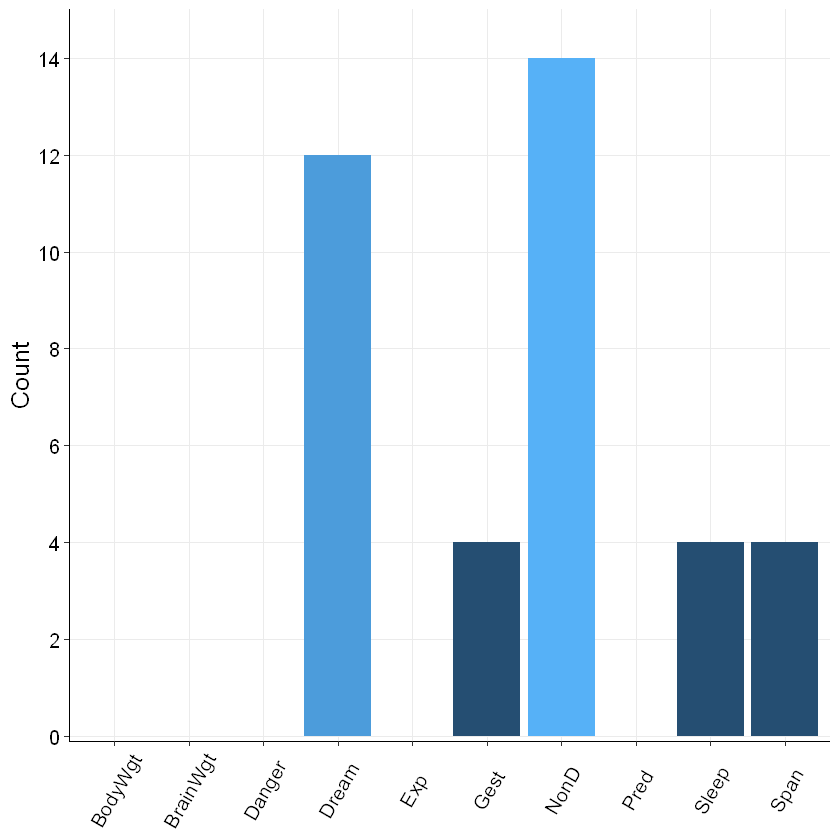

In [ ]:
library(VIM)
library(tidyverse)
library(ggpubr)
library(showtext)
library(scales)
font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
data <- summary(aggr(sleep, plot = FALSE))$missings
ggplot(
  data = data, 
  mapping = aes(x = Variable, y = Count, fill = Count)
  )+
  geom_col()+
  scale_y_continuous(
    breaks = breaks_width(width = 2),
    expand = expansion(add = c(0.1, 1))
    )+
  theme_pubr()+
  theme(
    legend.position = "none",
    panel.grid.major = element_line(),
    axis.text.x = element_text(angle = 60, vjust = .5, size = 12),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 15),
  )

- 缺失模式统计

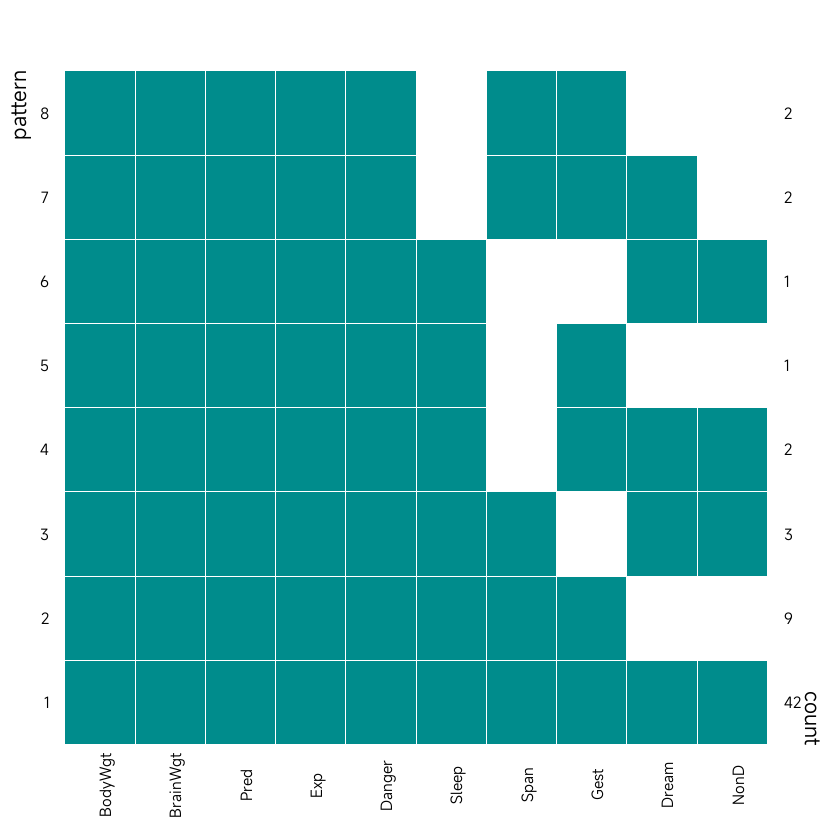

In [ ]:
library(VIM)
library(mice)
library(tidyverse)
library(ggpubr)
library(showtext)
library(scales)
font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()
count = head(rownames(md.pattern(sleep, plot = FALSE)), -1)
data <- as.data.frame(md.pattern(sleep, plot = FALSE))
head(data, -1)%>%
  select(-V11)%>%
    pivot_longer(
      cols = BodyWgt:NonD,
      names_to = "variable",
      values_to = "is_na"
    ) %>%
      mutate(
        variable = fct(variable),
        is_na = factor(is_na),
        pattern = rep(seq(1, 8), each = 10))%>%
        ggplot()+
        geom_tile(
          mapping = aes(x = variable, y = pattern, fill = is_na), 
          color = "white"
          )+
        scale_fill_manual(values =  c("1" = "#008c8c", "0" = "white"))+
        scale_y_continuous(
          breaks = breaks_width(width = 1),
          sec.axis = sec_axis(
            trans = ~.x,
            name = "count",
            breaks = seq(1, 8), 
            labels = count
          ),
          expand = expansion(mult = c(0, 0))
        )+
        theme_pubr()+
        theme(
          text = element_text(family = "misans"),
          plot.margin = margin(1.5, 0.2, 0.5, 0.2, "cm"),
          legend.position = "none",
          axis.line  = element_blank(),
          axis.ticks = element_blank(),
          axis.title.y.left = element_text(size = 16, hjust = 1),
          axis.title.y.right = element_text(size = 16, hjust = 1),
          axis.title.x = element_blank(),
          axis.text = element_text(size = 11),
          axis.text.x  = element_text(angle = 90)
        )

- 所有实例数据可视化

这种方法先将所有数据重新转换到[0,1]区间，并着色：浅色表示值小，深色表示值大。缺失值是另一种显眼的颜色（如白色）。

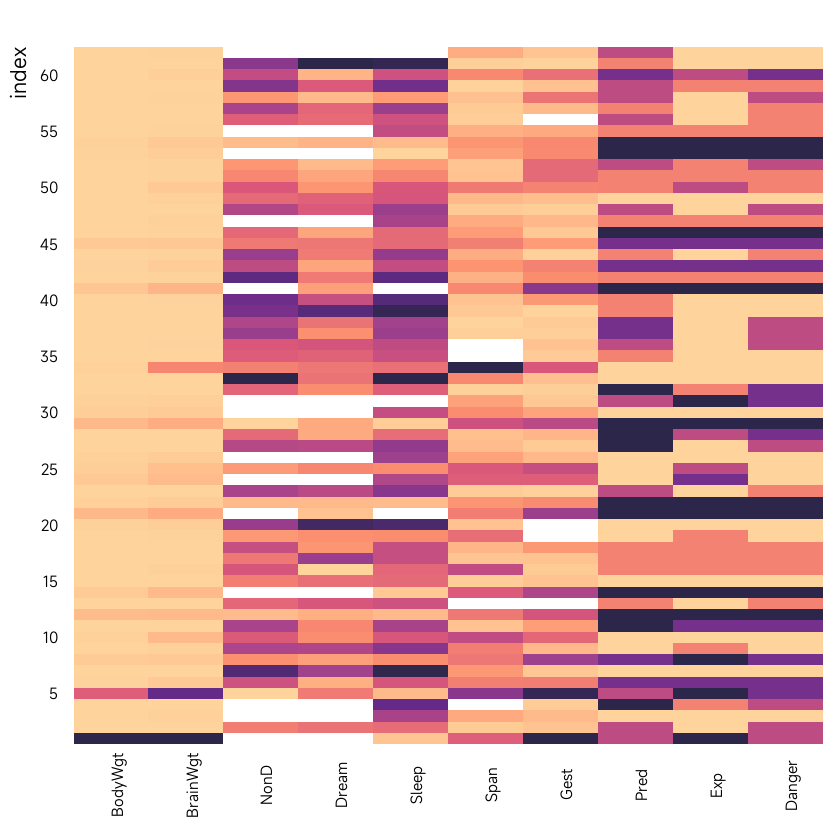

In [ ]:
library(VIM)
library(mice)
library(tidyverse)
library(ggpubr)
library(showtext)
library(scales)
font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
reframe(
  .data = sleep,
  across(
    .cols = 1:ncol(sleep),
    .fns = rescale
  )
  ) %>%
  pivot_longer(
    cols = BodyWgt:Danger,
    names_to = "variable",
    values_to = "num"
  ) %>%
  mutate(
    variable = fct(variable),
    index = rep(1:nrow(sleep),each = ncol(sleep))) %>%
  ggplot()+
    geom_tile(
      mapping = aes(x = variable, y = index, fill = num)
      )+
      scale_fill_viridis_c(
        na.value = "white",
        option = "magma",
        direction = -1,
        begin = .1,
        end = .9,
        alpha = .9
        )+
      scale_y_continuous(
                breaks = breaks_width(width = 5),
                expand = expansion(mult = c(0, 0)),
                
      )+
      theme_pubr()+
      theme(
        text = element_text(family = "misans"),
        plot.margin = margin(1, 0.2, 0.5, 0.2, "cm"),
        legend.position = "none",
        axis.line  = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y.left = element_text(size = 16, hjust = 1),
        axis.title.y.right = element_text(size = 16, hjust = 1),
        axis.title.x = element_blank(),
        axis.text = element_text(size = 11),
        axis.text.x  = element_text(angle = 90)
      )

#### 理解缺失数据的来由和影响

在识别缺失数据的数目、分布和模式后，我们有两个目的：(1) 分析生成缺失数据的潜在机制；(2) 评价缺失数据对回答实质性问题的影响。具体来讲，我们需要了解：
- 缺失数据的比例多大？
- 缺失数据是否集中在少数几个变量上，抑或广泛存在？
- 缺失是随机产生的吗？
- 缺失数据间的相关性或与可观测数据间的相关性，是否可以表明产生缺失值的机制？

这些问题的识别能够帮助我们分析缺失数据的类型：进而选择是删除数据还是尝试恢复数据。

#### 缺失值处理

##### 单纯的数据处理

这种方法更注重于数据的完整性，可能会忽略一定的科学性与合理性。

`replace_na()`函数可以实现对缺失值的替换：
```r
replace_na(data, replace, ...)
```
其中data可以表示数据框或者向量。如果data参数是一个数据框，那么replace参数需要接受一个具有命名值的列表，其成分为“列名 = 值”：

In [ ]:
library(tidyverse)
head(starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


In [ ]:
exam1 <- starwars %>% 
replace_na(list(
    hair_color = "unknown",
    height = round(
        mean(.[["height"]])
    )
))

如果data参数接受的是向量而不是数据框，那么replace只要接受一个单一值即可。该单一值将会替换向量中的所有缺失值：

In [ ]:
exam2 <- starwars %>% 
    mutate(
        across(
            where(is.double), 
            ~ replace_na(.x, mean(.x, na.rm = TRUE))
            )
        )

##### 理性处理不完整数据

这种处理方法基于推理方法，这会根据变量间的数学或者逻辑关系来填补或恢复缺失值。

##### 完整实例分析（行删除）

在完整实例分析中，只有每个变量都包含了有效数据值的观测才会保留下来做进一步的分析。于是我们有时候会采用将包含一个或多个缺失值的观测直接删去。但需要注意的是：<span style = 'color:red'><strong>行删除法假定数据是MCAR（即完整的观测只是全数据集的一个随机子样本）</strong></span>。

##### 多重插补

多重插补（MI）是一种基于<span style = 'color:red'><strong>模型估计和重复模拟</strong></span>的处理缺失值的方法。在面对复杂的缺失值问题时，MI是最常选用的方法。R中可以利用mice包进行多重插补，大致步骤如下：

![](图片素材\多重插补.png)

函数`mice()`首先从一个包含缺失数据的数据框开始，然后返回包含多个完整数据集的对象。每个完整数据集都是通过对原始数据框中的缺失数据进行插补而生成的。由于插补有随机的成分，因此每个完整数据集都略有不同。缺失值的插补通过Gibbs抽样完成。每个包含缺失值的变量都默认可通过数据集中的其他变量预测得来，于是这些预测方程便可用来预测缺失数据的有效值。该过程不断迭代直到所有的缺失值都收敛为止。对于每个变量，用户可以选择预测模型的形式和待选入的变量。

```r
mice(
  data,
  m = 5,
  method = NULL,
  predictorMatrix,
  ignore = NULL,
  where = NULL,
  blocks,
  visitSequence = NULL,
  formulas,
  blots = NULL,
  post = NULL,
  defaultMethod = c("pmm", "logreg", "polyreg", "polr"),
  maxit = 5,
  printFlag = TRUE,
  seed = NA,
  data.init = NULL,
  ...
)
```

参数解释：
- `data`：包含不完整数据的数据框或矩阵。缺失值被编码为NA。
- `m`：多次插补的数量（即生成m个插补数据集）。默认为m = 5。
- `method`：可以是单个字符串，也可以是长度为`length(blocks)`的字符串向量，指定要用于数据中每列的插补方法。如果指定为单个字符串，则所有blocks都将使用相同的方法。默认的插补方法（当没有指定参数时）取决于目标列的测量水平---由`defaultMethod`参数调节。不需要插补的列使用空方法""。对于单变量插补方法主要有：
  - `pmm`：Predictive mean matching（预测均值匹配），适用于任意变量类型。
  - `midastouch`：Weighted predictive mean matching（加权预测均值匹配），适用于任意变量类型。
  - `sample`：从观察值中随机抽取作为插值，适用于任意变量类型。
  - `cart`：分类和回归树，适用于任意变量类型。
  - `rf`：随机森林插补，适用于任意变量类型。
  - `mean`：无条件均值插补，适用于数值变量类型。
  - `norm`：贝叶斯线性回归，适用于数值变量类型。
  - `norm.boot`：使用Bootstrap的线性回归，适用于数值变量类型。
  - `lasso.norm`：lasso线性回归，适用于数值变量类型。
  - `lasso.select.norm`：lasso选择 + 线性回归，适用于数值变量类型。
  - `quadratic`：二次项插补，适用于数值变量类型。
  - `logreg`：逻辑回归，适用于二元变量类型。
  - `logreg.boot`：带有Bootstrap的逻辑回归，适用于二元变量类型。
  - `lasso.logreg`：lasso逻辑回归，适用于二元变量类型。
  - `lasso.select.logreg`：lasso特征选择 + 逻辑回归，适用于二元变量类型。
  - `polr`：比例几率模型，适用于有序变量类型。
- `predictorMatrix`：一个大小为`length(blocks)`行和`ncol(data)`列的数值矩阵，该矩阵只包含0，1数据。矩阵每行对应一个block，即要插补的变量集，每列对应一个变量。值为1意味着列变量将用作目标block的预测变量。默认情况下，predictorMatrix是一个`ncol(data)`行和列的方阵，该方阵除对角线外全部为1。注意：对于具有"2l"（两级）的插补模型，还允许使用其他代码（例如2或-2）。
- `ignore`：一个逻辑向量，包含`nrow(data)`个元素，指示在创建插补模型时要忽略哪些行。默认为NULL，包括具有要插补变量的观察值的所有行。将ignore设置为TRUE的行不会影响插补模型的参数，但仍会被插补。可以使用ignore参数将数据分为训练集（构建插补模型）和测试集（不影响插补模型估计）。
- `where`：一个与数据相同维度的逻辑数据框或矩阵，指示应在哪里创建插补。默认情况下，where = is.na(data)指定要插补缺失数据。可以使用where参数来过度插补观察数据，或跳过选定的缺失值插补。
- `blocks`：参数传入一个列表，列表的每一个元素---block 的值，都是变量名向量。同时列表的每一个元素都可以被命名，以识别不同的block。block内的指定的变量通过多变量的插补方法进行插补（method参数所指定）。默认情况下，每个变量都放置在自己的block中。只有其名称出现在blocks中的变量才会被插补。在不同的块中，同一变量可以重复出现。在这种情况下，每次访问时都会重新插补它。
- `visitSequence`：一个任意长度的向量，向量是包含block名称的向量。向量用于指定在Gibbs采样的一次迭代中要插补的block的顺序。前面讲过，一个block是一个变量集合。同一block可以有一个及以上的变量，所有成员变量在访问block时进行插补。同时属于多个block的变量在同一次迭代内进行重新插补。默认visitSequence = "roman"按照块在blocks中出现的顺序（从左到右）访问块。还可以使用以下关键字之一："arabic"（从右到左），"monotone"（按缺失数据的升序比例排序）和"revmonotone"（monotone的反转）
- `defaultMethod`：一个长度为4的向量，包含默认的插补方法，分别适用于（1）数值数据（2）具有2个水平的因子数据（3）具有多于2个无序水平的因子数据和（4）具有多于2个有序水平的因子数据。默认情况下，对应使用的方法为pmm（predictive mean matching，预测均值匹配）（数值数据）、logreg（logistic regression，逻辑回归插补）（二元数据，具有2个水平的因子）、polyreg（多类别逻辑回归插补）（无序分类数据，具有>2个水平的因子）和polr（proportional odds model，比例几率模型插补）（有序，> 2个水平的因子）。
- `maxit`：一个标量，表示迭代次数。默认值为5。
- `printFlag`：如果为TRUE，则mice将在控制台上打印历史记录。对于静默计算，如果不需打印，使用<span style = 'color:red'><strong>print = FALSE</strong></span>。
- `seed`：一个整数，用作set.seed()的参数，用于设定随机数种子。
- `data.init`：一个与data大小和类型相同的数据框，不包含缺失数据，在迭代过程开始之前用于初始化插补。默认为NULL，这意味着起始插补是通过从data数据中简单随机抽取进行的。

In [ ]:
library(mice)
data(sleep, package = "VIM")
imp1 <- mice(
  data = sleep,
  m = 5,
  method = "rf",
  maxit = 10,
  seed = 12345,
  print = FALSE
  )
imp1

Class: mids
Number of multiple imputations:  5 
Imputation methods:
 BodyWgt BrainWgt     NonD    Dream    Sleep     Span     Gest     Pred 
      ""       ""     "rf"     "rf"     "rf"     "rf"     "rf"       "" 
     Exp   Danger 
      ""       "" 
PredictorMatrix:
         BodyWgt BrainWgt NonD Dream Sleep Span Gest Pred Exp Danger
BodyWgt        0        1    1     1     1    1    1    1   1      1
BrainWgt       1        0    1     1     1    1    1    1   1      1
NonD           1        1    0     1     1    1    1    1   1      1
Dream          1        1    1     0     1    1    1    1   1      1
Sleep          1        1    1     1     0    1    1    1   1      1
Span           1        1    1     1     1    0    1    1   1      1

提取插补后变量值

In [ ]:
print(imp1$imp)

$BodyWgt
[1] 1 2 3 4 5
<0 rows> (or 0-length row.names)

$BrainWgt
[1] 1 2 3 4 5
<0 rows> (or 0-length row.names)

$NonD
      1    2    3    4    5
1   3.2  3.2  3.2  3.2  4.9
3  11.9 11.0 10.0 15.2 11.0
4  11.9  6.3 10.6 11.0 17.9
14  2.1  2.1  3.2  2.1  3.3
21  6.1 10.0  2.1  3.2  2.1
24  9.7 10.9  9.1  8.3  8.4
26 10.9  7.4  8.3 12.8 10.8
30  7.4 10.9 15.2  6.1  7.4
31  7.5  8.4  2.1  8.2 10.0
41  3.2  4.9  7.5  3.3  2.1
47  9.7 12.0 11.0 15.2  9.7
53  7.5 11.9  8.4  3.3  3.2
55  8.2  6.3  6.5 14.3  8.4
62 15.8  6.3  8.3 11.9  8.6

$Dream
     1   2   3   4   5
1  1.0 0.3 0.3 1.9 1.0
3  3.1 2.4 2.0 3.9 3.1
4  2.3 0.5 0.6 2.0 2.0
14 0.8 0.5 1.8 0.6 1.0
24 1.5 1.5 1.9 0.6 0.9
26 4.1 1.9 4.1 2.0 0.9
30 2.2 1.9 6.1 1.4 3.1
31 0.0 0.5 0.6 0.8 3.6
47 3.6 1.2 0.0 1.8 1.8
53 0.6 0.5 0.6 0.9 0.5
55 2.6 4.1 3.6 3.1 1.2
62 5.6 1.4 2.0 2.6 0.9

$Sleep
      1    2    3    4    5
21  8.0  3.1  3.1  2.9  8.4
31  3.8 12.5  3.8  2.6 12.5
41  3.8  3.9  3.8  3.8  3.1
62 19.4  8.0 10.7 12.5 11.0

$Sp

In [ ]:
# 继续提取单个变量
print(imp1$imp$Sleep)

      1    2    3    4    5
21  8.0  3.1  3.1  2.9  8.4
31  3.8 12.5  3.8  2.6 12.5
41  3.8  3.9  3.8  3.8  3.1
62 19.4  8.0 10.7 12.5 11.0


提取插补变量块

In [ ]:
print(imp1$blocks)

$BodyWgt
[1] "BodyWgt"

$BrainWgt
[1] "BrainWgt"

$NonD
[1] "NonD"

$Dream
[1] "Dream"

$Sleep
[1] "Sleep"

$Span
[1] "Span"

$Gest
[1] "Gest"

$Pred
[1] "Pred"

$Exp
[1] "Exp"

$Danger
[1] "Danger"

attr(,"calltype")
 BodyWgt BrainWgt     NonD    Dream    Sleep     Span     Gest     Pred 
  "type"   "type"   "type"   "type"   "type"   "type"   "type"   "type" 
     Exp   Danger 
  "type"   "type" 


改变插值方法

In [ ]:
meth <- imp1$method
print(meth)

 BodyWgt BrainWgt     NonD    Dream    Sleep     Span     Gest     Pred 
      ""       ""     "rf"     "rf"     "rf"     "rf"     "rf"       "" 
     Exp   Danger 
      ""       "" 


In [ ]:
meth["Sleep"] <- "pmm"
# 再运行一遍
imp2 <- mice(
  data = sleep,
  m = 5,
  method = meth,
  maxit = 10,
  seed = 12345,
  print = FALSE
  )
print(imp2$imp$Sleep)

      1    2    3    4    5
21  5.4  3.1  2.9  3.1  3.9
31 14.5  5.4  9.8  8.4  3.8
41  3.1  3.9  3.3  8.6  6.2
62 13.8 13.3 15.8 13.3 12.5


改变目标插值变量的预测变量

In [ ]:
pred <- imp1$pred
print(pred)

         BodyWgt BrainWgt NonD Dream Sleep Span Gest Pred Exp Danger
BodyWgt        0        1    1     1     1    1    1    1   1      1
BrainWgt       1        0    1     1     1    1    1    1   1      1
NonD           1        1    0     1     1    1    1    1   1      1
Dream          1        1    1     0     1    1    1    1   1      1
Sleep          1        1    1     1     0    1    1    1   1      1
Span           1        1    1     1     1    0    1    1   1      1
Gest           1        1    1     1     1    1    0    1   1      1
Pred           1        1    1     1     1    1    1    0   1      1
Exp            1        1    1     1     1    1    1    1   0      1
Danger         1        1    1     1     1    1    1    1   1      0


In [ ]:
pred[, "Danger"] <- 0
# 重新插补
imp3 <- mice(
  data = sleep,
  m = 5,
  method = meth,
  predictorMatrix = pred,
  maxit = 10,
  seed = 12345,
  print = FALSE
  )
print(imp3$imp$Sleep)

      1   2    3    4    5
21  3.3 5.4  3.3  3.9  3.1
31  8.3 8.4 13.8 10.3  5.4
41  3.9 3.9  6.2  8.2  2.6
62 11.0 9.8 14.5 13.8 13.8


提取任意一个插补数据集

可以利用`complete()`函数，用法如下：


In [ ]:
imp4 <- mice(
  data = sleep,
  m = 5,
  defaultMethod = c("rf", "logreg.boot", "polyreg", "polr"),
  maxit = 30,
  seed = 12345,
  print = FALSE
  )
# 利用complete()函数可以观察m个插补数据集中的任意一个。
data1 <- complete(imp4, action = 1)
print(data1)

    BodyWgt BrainWgt NonD Dream Sleep  Span  Gest Pred Exp Danger
1  6654.000  5712.00  2.1   1.9   3.3  38.6 645.0    3   5      3
2     1.000     6.60  6.3   2.0   8.3   4.5  42.0    3   1      3
3     3.385    44.50 12.0   2.0  12.5  14.0  60.0    1   1      1
4     0.920     5.70  7.4   2.0  16.5   5.0  25.0    5   2      3
5  2547.000  4603.00  2.1   1.8   3.9  69.0 624.0    3   5      4
6    10.550   179.50  9.1   0.7   9.8  27.0 180.0    4   4      4
7     0.023     0.30 15.8   3.9  19.7  19.0  35.0    1   1      1
8   160.000   169.00  5.2   1.0   6.2  30.4 392.0    4   5      4
9     3.300    25.60 10.9   3.6  14.5  28.0  63.0    1   2      1
10   52.160   440.00  8.3   1.4   9.7  50.0 230.0    1   1      1
11    0.425     6.40 11.0   1.5  12.5   7.0 112.0    5   4      4
12  465.000   423.00  3.2   0.7   3.9  30.0 281.0    5   5      5
13    0.550     2.40  7.6   2.7  10.3   3.5  42.0    2   1      2
14  187.100   419.00  3.3   0.3   3.1  40.0 365.0    5   5      5
15    0.07

追踪线可视化

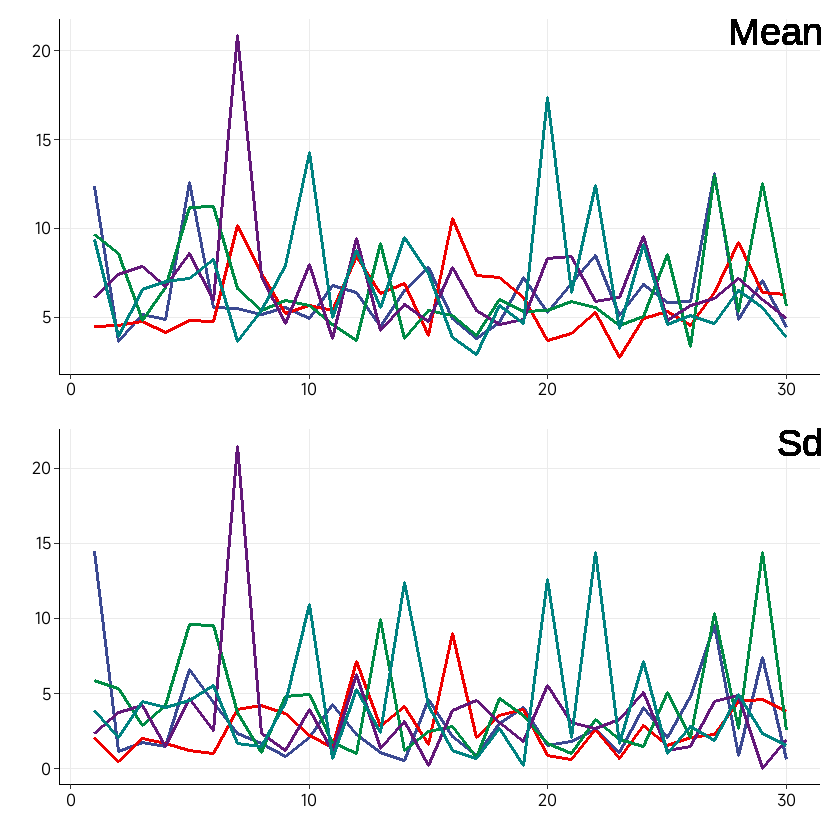

In [ ]:
# 以Span变量为例，若追踪线线迹充分混合且没有趋势，表明算法收敛良好
library(mice)
library(VIM)
library(tidyverse)
library(scales)
library(ggpubr)
library(showtext)
library(ggsci)
library(patchwork)
library(ggpp)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()

theme_fan <- function(...){
  theme_pubr()+
  theme(
    text = element_text(size = 12, family = "misans"),
    title = element_blank(),
    panel.grid.major = element_line()
  )
}
data1 <- imp4$chainMean
lapply(1:5, function(i) data1[,,i][6,]) %>%
  unlist() -> mean
p1 <- tibble(
  iter = rep(1:30, times = 5),
  mean = mean,
  chain = factor(rep(1:5, each = 30))
) %>%
  ggplot(aes(x = iter, y = mean)) +
    geom_line(
      mapping = aes(group = chain, color = chain), 
      linewidth = 1,
      show.legend = F
      )+
    geom_text_npc(
      mapping = aes(npcx = 1, npcy = 1, label = "Mean"),
      size = 10
      )+
    scale_colour_aaas()+
    theme_fan()

data2 <- imp4$chainVar
lapply(1:5, function(i) data2[,,i][6,]) %>%
  unlist %>%
  sqrt() -> sd
p2 <- tibble(
  iter = rep(1:30, times = 5),
  sd = sd,
  chain = factor(rep(1:5, each = 30))
) %>%
  ggplot(aes(x = iter, y = sd)) +
  geom_line(
    mapping = aes(group = chain, color = chain), 
    linewidth = 1,
    show.legend = F
  )+
  geom_text_npc(
  mapping = aes(npcx = 1, npcy = 1, label = "Sd"),
  size = 10
  )+
  scale_colour_aaas()+
  theme_fan()
p1/p2

然后，利用`with()`函数可依次对每个完整数据集应用统计模型（如线性模型或广义线性模型）。也可以进一步查看每一个插补数据集的拟合结果。

In [ ]:
fit <- with(imp4, lm(Dream ~ Span + Gest)) 
print(summary(fit))

# A tibble: 15 × 6
   term        estimate std.error statistic  p.value  nobs
   <chr>          <dbl>     <dbl>     <dbl>    <dbl> <int>
 1 (Intercept)  2.60      0.259      10.1   2.06e-14    62
 2 Span        -0.00698   0.0125     -0.557 5.80e- 1    62
 3 Gest        -0.00358   0.00157    -2.28  2.60e- 2    62
 4 (Intercept)  2.64      0.288       9.18  5.79e-13    62
 5 Span        -0.00720   0.0138     -0.522 6.03e- 1    62
 6 Gest        -0.00347   0.00171    -2.02  4.75e- 2    62
 7 (Intercept)  2.66      0.266      10.0   2.52e-14    62
 8 Span        -0.00895   0.0127     -0.703 4.85e- 1    62
 9 Gest        -0.00326   0.00158    -2.06  4.38e- 2    62
10 (Intercept)  2.41      0.245       9.83  4.88e-14    62
11 Span        -0.00806   0.0118     -0.681 4.98e- 1    62
12 Gest        -0.00278   0.00148    -1.88  6.56e- 2    62
13 (Intercept)  2.48      0.240      10.3   7.38e-15    62
14 Span        -0.00317   0.0116     -0.274 7.85e- 1    62
15 Gest        -0.00366   0.00145    

最后，`pool()`函数将这些单独的分析结果整合为一组结果---一个包含这m个统计分析平均结果的列表对象。最终模型的标准误和p值都将准确地反映出由于缺失值和多重插补而产生的不确定性。

In [ ]:
pooled <- pool(fit)
print(summary(pooled))

         term     estimate   std.error statistic       df      p.value
1 (Intercept)  2.558821088 0.286253706  8.938997 34.67683 1.592399e-10
2        Span -0.006872543 0.012747305 -0.539137 54.07182 5.920054e-01
3        Gest -0.003349887 0.001609061 -2.081890 51.42229 4.234733e-02


## 循环操作

### for, while循环

在做此类循环时，需要注意以下两个关键点：
1. 提前为保存循环结果分配存储空间。
2. 为循环体中涉及到的数据选择合适的数据结构。

### apply函数族

apply函数族可以代替大部分的for循环、while循环，其大意是“应用（apply）”某函数（fun）到一系列的对象上。根据应用到的对象的不同，是一族apply函数。
常用的有：
- 分组计算：`apply()`和`tapply()`
- 循环迭代：`lapply()`和`sapply()`
- 多变量计算：`mapply()`

#### apply()函数

apply()函数是最常用的代替for循环的函数。apply函数可以对矩阵、数据框、数组(二维、多维)，按行或列进行循环计算，对子元素进行迭代，并把子元素以参数传递的形式给自定义的FUN函数中，并以返回计算结果。基本格式为：
```r
apply(X, MARGIN, FUN, ..., simplify = TRUE)
```

- `X`：计算对象
- `MARGIN`：一个向量，指定要应用函数的子脚本。例如，对于一个矩阵，<span style = 'color:red'><strong>1表示行，2表示列，c(1, 2)表示行和列</span></strong>。对于一个数组，参数的值指定对应数组的维度。如果X具有命名的dimnames，它可以是一个字符向量，选择维度名称。
- `FUN`：要应用的函数。对于像+，%*%，等等这样的函数，函数名称必须用反引号或引号括起来。
- `...`：FUN的可选参数。
- `simplify`：一个逻辑值，指示是否在可能的情况下简化结果。如果为FALSE，结果返回列表。

#### tapply()函数

按一组因子INDEX对数据列 x 分组，再分别对每组作用上函数fun。基本格式为：
```r
tapply(X, INDEX, FUN = NULL, ..., default = NA, simplify = TRUE)
```

其中，X通常为向量；INDEX为与x长度相同的因子列表（若不是因子，R会强制转化为因子）；simplify = FALSE，返回值为list对象

### lapply()函数

该函数是一个最基础循环操作函数，用来对vector、list、data.frame<span style = 'color:red'><strong>逐元、逐成分、逐列</strong></span>分别应用函数fun，并返回和X长度同样的`list`列表作为结果。
```r
lapply(X, FUN, ...)
```

#### sapply()函数

该函数是lapply()的简化版本，多了一个参数simplify，默认为TRUE。若simplify = FALSE，则同lapply()，若为TRUE，则将输出的list简化为向量或矩阵。基本格式为：
```r
sapply(X, FUN, ..., simplify = TRUE, USE.NAMES = TRUE)
```

#### mapply()函数

mapply()函数是sapply()函数的<span style = 'color:red'><strong>多变量版本</strong></span>。mapply()将函数FUN应用于每个`...`参数的第一个元素，第二个元素，第三个元素，依此类推。如果需要，参数将被循环使用。总的来说该函数的FUN需要传入多参数。
```r
mapply(FUN, ..., MoreArgs = NULL, SIMPLIFY = TRUE,
       USE.NAMES = TRUE)
```

其中`MoreArgs`是一个包含其他要传递给FUN函数的参数<span style = 'color:red'><strong>列表</strong></span>。也就是说，除了`FUN`和`...`参数之外，可以使用`MoreArgs`来传递额外的参数给`FUN`函数，这些参数将在函数调用中使用。

In [ ]:
result1 <- mapply(rep, 1:4, MoreArgs = list(x = 1:4))
print(result1)

[[1]]
[1] 1 2 3 4

[[2]]
[1] 1 2 3 4 1 2 3 4

[[3]]
 [1] 1 2 3 4 1 2 3 4 1 2 3 4

[[4]]
 [1] 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4



不过mapply()是完全不需要研究的base语法，有更好的map语法实现。

### map泛型函数

泛型函数，相当于数学中的“泛函”，即函数的函数。“传递一个函数给另一个函数”是非常强大的思想，这也是R作为泛函型编程语言的表现之一。`purrr`包提供的函数足以代替许多通常的for循环。虽然apply函数族也能解决类似的问题，但purrr包更具有一致性，从而也更容易学习。另外，purrr包还支持一些快捷用法，且所有函数都是用C语言写的，<span style = 'color:red'><strong>速度更快</strong></span>。用purrr包的解决问题的逻辑是：
1. 针对列表每个单独的元，你怎么解决某问题？一旦你解决了该问题，purrr包就可以将你的求解推广到列表中的每一个元。
2. 若你正在解决一个复杂问题，你怎么把它分解成若干小问题，使得你能够逐步完成求解？用purrr包，你就可以将这些小问题的求解步骤用管道组合到一起。

#### map函数族

我们知道循环迭代就是将函数依次应用（映射）到序列的每一个元素上，做相同的操作。序列由一系列可以根据位置索引的元素构成，元素可以很复杂，也可以是不同类型的。`purrr`包提供了一族`map`函数来做这种迭代思想。`map`将定义的函数映射到序列中的每个元素（注意数据框作为特殊的列表，其序列元素为`df[[1]], df[[2]]`等），并返回与输入**相同长度**的结果（每个元素作用后返回一个结果），最后再将这些结果打包到一起返回。`map`函数的后缀决定打包结果，<span style = 'color:red'><strong>如果能打包到一起，就选择合适的后缀打包到一起</strong></span>：
- `map(.x, .f)`：打包成**列表**，基本等同于lapply()。
- `map_lgl(.x, .f)`：打包成**逻辑向量**。
- `map_int(.x, .f)`：打包成**整数型向量**。
- `map_dbl(.x, .f)`：打包成**浮点数（实数型）向量**。
- `map_chr(.x, .f)`：打包成**字符型向量**。 
- `map_dfc(.x, .f)`：打包成**数据框列表**，在通过`bind_cols`按行合并为一个数据框。
- `map_dfr(.x, .f)`：打包成**数据框列表**，在通过`bind_rows`按行合并为一个数据框。

参数解释：
- `.f`：表示一个函数，可以用以下方式指定：
    - 命名函数，例如mean等。
    - 匿名函数，例如`\(x) x + 1`或`function(x) x + 1`，为了书写的简洁，更推荐第一种。
    - purrr风格的公式，例如`~ .x + 1`，`~ log(..1 + ..2 + ..3)`。
- `...`：传递给映射函数的其他参数。不过现在通常不建议使用`...`来传递额外的（常量）参数给.f 函数。这是因为这种方式可能会导致参数传递不清晰，容易混淆哪些参数属于哪个函数，也可能导致错误消息不够明确。相反，使用简写的匿名函数。这样更容易理解哪些参数属于哪个函数，并且通常会生成更好的错误消息。

In [ ]:
library(tidyverse)
set.seed(77)
df <- tibble(
    a = rnorm(10),
    b = rnorm(10),
    c = rnorm(10)
)

print(map_dbl(df, mean))
print(map_dfr(df, mean))


        a         b         c 
0.4016410 0.1711823 0.1776984 
# A tibble: 1 × 3
      a     b     c
  <dbl> <dbl> <dbl>
1 0.402 0.171 0.178


`map2()`函数依次应用二元函数到两个序列的每对元素：

```r
map2(.x, .y, .f, ..., .progress = FALSE)
map2_*(.x, .y, .f, ..., .progress = FALSE)
```

`map2()`函数也会存在后缀的情况。参数`.x`表示序列1，`.y`表示序列2，`.f`表示映射的二元函数。

In [ ]:
x <- list(1, 1, 1)
y <- list(10, 20, 30)
mapping <- map2(x, y, \(x, y) x + y)
print(mapping)

[[1]]
[1] 11

[[2]]
[1] 21

[[3]]
[1] 31



In [ ]:
mu = c(5,10,-3)
sigma = c(1,5,10)
print(map2(mu, sigma, rnorm, n = 5))

[[1]]
[1] 4.845669 4.045689 5.667252 5.388489 5.549162

[[2]]
[1]  3.475094 14.434681 21.679839 12.515820 -1.339873

[[3]]
[1] -23.315439  -4.380738 -12.525207  12.776613 -15.478600



`pmap()`函数可以应用多元函数到多个序列的每组元素。也就是说，可以实现对数据框的逐行迭代。

```r
pmap(.l, .f, ..., .progress = FALSE)
pmap_*(.l, .f, ..., .progress = FALSE)
```

`pmap()`函数也有后缀的形式。不过同样在涉及到数据框的相应计算时，不如使用tidyverse的思想。

In [ ]:
set.seed(99)
tibb <- tibble(
    n = c(1, 3, 5),
    mean = c(5, 10, -3),
    sd = c(1, 5, 10)
)
print(
    pmap(tibb, ~ rnorm(..1, ..2, ..3))
)

[[1]]
[1] 5.213963

[[2]]
[1] 12.39829 10.43914 12.21929

[[3]]
[1]  -6.628379  -1.773260 -11.638452   1.896243  -6.641169

